# AB-тестирование
## Задание AB.3


**Правила:**

* Дедлайны см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Выполненную работу нужно отправить телеграм-боту `@miptstats_ds24_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. **Работы, присланные иным способом, не принимаются.**
* Дедлайны см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно **ноутбук в формате `ipynb`**.
* Следите за размером файлов. **Бот не может принимать файлы весом более 20 Мб.** Если файл получается больше, заранее разделите его на несколько.
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания все участники списывания будут сдавать устный зачет.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*
* В каждой задаче не забывайте делать **пояснения и выводы**.

**Правила оформления теоретических задач:**

* Решения необходимо прислать одним из следующих способов:
  * фотографией в правильной ориентации, где все четко видно, а почерк разборчив,
    * отправив ее как файл боту вместе с ноутбуком *или*
    * вставив ее в ноутбук посредством `Edit -> Insert Image` (<font color="red">фото, вставленные ссылкой, не принимаются</font>);
  * в виде $\LaTeX$ в markdown-ячейках.
* Решения не проверяются, если какое-то требование не выполнено. Особенно внимательно все проверьте в случае выбора второго пункта (вставки фото в ноутбук). <font color="red"><b>Неправильно вставленные фотографии могут не передаться при отправке.</b></font> Для проверки попробуйте переместить `ipynb` в другую папку и открыть его там.
* В решениях поясняйте, чем вы пользуетесь, хотя бы кратко. Например, если пользуетесь независимостью, то достаточно подписи вида "*X и Y незав.*"
* Решение, в котором есть только ответ, и отсутствуют вычисления, оценивается в 0 баллов.

---


**Баллы за задание:**

* Задача 1 — 50 баллов
* Задача 2 — 130 баллов
* Задача 3 — 30 баллов
* Задача 4 — 50 баллов
* Задача 5 — 50 баллов

In [1]:
# Bot check

# HW_ID: ds_ab3
# Бот проверит этот ID и предупредит, если случайно сдать что-то не то.

# Status: not final
# Перед отправкой в финальном решении удали "not" в строчке выше.
# Так бот проверит, что ты отправляешь финальную версию, а не промежуточную.
# Никакие значения в этой ячейке не влияют на факт сдачи работы.

<b><font size="5">Дорешка:</font></b>

* <b><font size="4">Задача 1</font></b>
  * <b><font color="#00b565" size="3">Заметил несопоставимость групп до эксперимента</font></b>
  * <b><font color="#00b565" size="3">Добавил стратификацию похожих</font></b>

* <b><font size="4">Задача 5</font></b>
  * <b><font color="#00b565" size="3">Дал правильный ответ на вопрос про ошибку 1-го рода</font></b>
  * <b><font color="#00b565" size="3">Догадался до бутстрепа</font></b>

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as sps
import random
import warnings
warnings.filterwarnings("ignore")

from tqdm import tqdm
from statsmodels.stats.proportion import proportion_confint

from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
from statsmodels.formula.api import ols

from xgboost import XGBRegressor

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid', palette='Set2')

---
### Задача 1.

Со слов менеджера по развитию интернет-магазина:

> Коллеги, приветики! В прошлом месяце мы проводили эксперимент, в корзине покупателей поставили большую мигающую кнопку "Оплатить" ярко-зеленого цвета. Предполагаем, что покупатель будет быстрее переходить к оплате, не удаляя из корзины лишние товары. Ожидаем прирост выручки на 8-10%. Помогите, пожалуйста, по-скорее оценить эффект, очень горят сроки, скоро выплаты премий, надо успеть раскатить. В <a href="https://disk.yandex.ru/i/L64ohe5i6oz58A">файлике</a> инфа по клиентам, пилотные клиенты отмечены в столбце `b_group`. Спасибо огромное!

Помогите коллегам с их запросом.

Посмотрим на данные.

In [3]:
data = pd.read_csv('hw_ab3_task1.csv').drop(["Unnamed: 0"], axis=1)

data.head()

,gender,OS,month1,month2,month3,month4,month5,month6,month7,month8,...,month10,month11,month12,month13,month14,month15,month16,month17,month18,b_group
0,woman,Android,0.000000,0.000000,1260.801227,1245.777408,0.000000,0.000000,1381.093860,1237.133907,...,1110.443064,0.000000,0.000000,0.000000,0.000000,1362.797130,1555.238727,0.000000,0.000000,no
1,man,Android,2142.521523,1821.295907,1832.895312,1646.448173,0.000000,2154.948644,1912.998501,1795.471291,...,0.000000,2253.871388,2526.126916,2861.138746,3068.924457,3384.232538,0.000000,0.000000,0.000000,yes
2,man,iOS,2064.105816,0.000000,0.000000,1454.148004,1821.118092,1917.801237,2188.827425,0.000000,...,1605.922754,0.000000,0.000000,1672.408077,1403.642040,1094.256738,962.442222,0.000000,1483.007220,no
3,woman,Android,1177.158341,1311.983158,0.000000,1302.464341,0.000000,0.000000,1479.573874,1356.655637,...,1713.852207,0.000000,0.000000,0.000000,1025.802676,1020.161834,949.921959,1029.725858,866.403692,yes
4,man,iOS,0.000000,2603.825002,2350.628045,2061.660828,1686.922097,0.000000,2720.638298,2541.299625,...,1920.793567,1879.833618,1991.184786,0.000000,2792.189328,2498.976500,2121.921368,2130.713432,2035.514926,no



<b><font color="#00b565" size="5">Заметил несопоставимость групп до эксперимента</font></b>

<b><font color="#00b565" size="3">Замечание:</font></b> <i> Не замечена несопоставимость групп до эксперимента. Комм. Прикол в том, что пытались раскатить изменения на чаще покупающих пользователях, из-за этого в месяце перед тестом аномально высокий доход от будущей тестовой группы. </i>

Посмотрим на распределение средних трат до теста

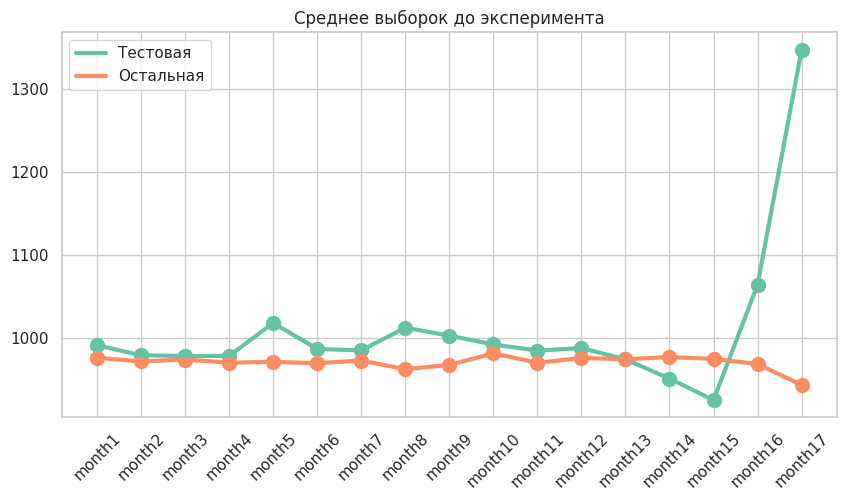

In [4]:
test_data = data[data['b_group'] == 'yes']
other_data = data[data['b_group'] == 'no']

plt.figure(figsize=(10, 5))
plt.title('Среднее выборок до эксперимента')

test_vals = test_data[[f'month{i}' for i in range(1, 18)]].mean()
plt.plot(test_vals, lw=3, label='Тестовая')
plt.scatter(np.arange(len(test_vals)), test_vals, s=100)

other_vals = other_data[[f'month{i}' for i in range(1, 18)]].mean()
plt.plot(other_vals, lw=3, label='Остальная')
plt.scatter(np.arange(len(test_vals)), other_vals, s=100)

plt.legend()
plt.xticks(rotation=45)
plt.show()

Видим, что до эксперимента есть сильный всплеск, что уже говорит о том, что группы вообще говоря выбирались не случайно, и это крайне необходимо учитывать в эксперименте далее.

<b><font color="#00b565" size="5">Конец исправлений</font></b>


Посмотрим на выручку в месяц до эксперимента

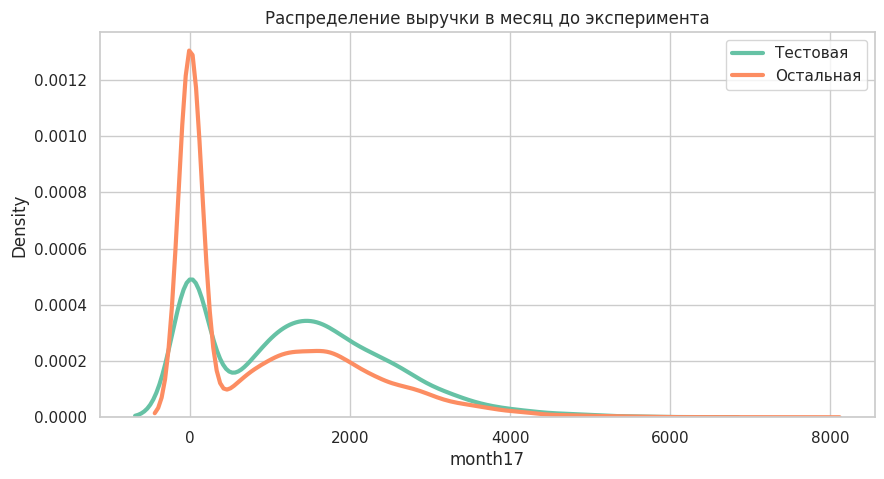

In [5]:
plt.figure(figsize=(10, 5))
plt.title('Распределение выручки в месяц до эксперимента')

sns.kdeplot(test_data['month17'], lw=3, label='Тестовая')
sns.kdeplot(other_data['month17'], lw=3, label='Остальная')

plt.legend()
plt.show()

Как видим тестовые покупатели менее активны, это будет удобно использовать в качестве страты

<b><font color="#00b565" size="5">Добавил стратификацию похожих</font></b>

<b><font color="#00b565" size="4">Замечание: </font></b> Не выполнен подбор похожих. Комм. Нужна стратификация по активности либо подбор похожих на предпериоде, подробнее в решении дз.

In [6]:
data['month17_active'] = (data['month17'] > 0).astype(int)
pd.crosstab(index=data['b_group'], columns=data['month17_active'], normalize='index')

month17_active,0,1
b_group,,
no,0.481148,0.518852
yes,0.272000,0.728000


In [7]:
def create_AB_dataset(data, strata_name='strata', sample_name='sample', b_group_name='b_group'):
    dataAB = pd.DataFrame()
    dataAB['strata'] = data[strata_name]
    dataAB['sample'] = data[sample_name]
    dataAB['b_group'] = data[b_group_name]
    return dataAB

In [8]:
dataAB = create_AB_dataset(data, strata_name='month17_active', sample_name='month18')
dataAB.head()

,strata,sample,b_group
0,0,0.000000,no
1,0,0.000000,yes
2,0,1483.007220,no
3,1,866.403692,yes
4,1,2035.514926,no


<b><font color="#00b565" size="5">Конец исправлений</font></b>

Разобьем данные на тест и контроль.

In [9]:
def calculate_strata_weights(data):
    '''
    Вычисляет веса страт.
    
    :param data: исходные данные
    :return: веса страт
    '''
    
    strata_weights = data.groupby(by='strata')["sample"].count()
    strata_weights = strata_weights / strata_weights.sum()
    return strata_weights

В таком случае, лучше всего подойдет стратифицированный t-test.

In [10]:
def weighted_mean(data, weights):
    '''
    Вычисляет взвешенное среднее.

    :param data: данные
    :param weights: веса страт
    :return: взвешенное среднее
    '''

    strata_means = data.groupby(by='strata')['sample'].mean()
    return (strata_means * weights).sum()


def simple_mean(data, weights):
    '''
    Вычисляет обычное выборочное среднее

    :param data: данные
    :param weights: не используется, нужен для совместимости
    :return: выборочное среднее
    '''

    return data['sample'].mean()

def random_sampler(data, sample_size):
    '''
    Случайное семплирование двух групп одного размера из данных.

    :param data: исходные данные
    :param sample_size: размер группы
    :return: две группы данных
    '''

    choiced = data.sample(n=2 * sample_size)
    return choiced.iloc[:sample_size], choiced.iloc[-sample_size:]


def sample_mean_diff(data, sample_size, n_iter):
    '''
    Реализация итераций семплирования двух случайных групп и вычисления разности средних.

    :param data: исходные данные
    :param sample_size: размер группы
    :param n_iter: количество итераций семплирования
    :return: выборка разности средних
    '''

    mean_sample = np.zeros(n_iter)

    for i in tqdm(range(n_iter)):
        groups = random_sampler(data, sample_size)
        mean_sample[i] = groups[0]['sample'].mean() - groups[1]['sample'].mean()

    return mean_sample


def stratified_sampler(data, sample_size):
    '''
    Стратифицированное семплирование выборок.

    :param data: данные
    :param sample_size: размер выборки
    :return: две выборки
    '''

    # Веса страт
    strata_weights = calculate_strata_weights(data)

    # Размер выборок
    strata_sample_size = np.floor(sample_size * strata_weights + 0.5).astype(int)

    a_group, b_group = [], []
    # Генерируем для каждой страты отдельно
    for i, strata in enumerate(data.groupby(by='strata')):
        a, b = random_sampler(strata[1], strata_sample_size[i])
        a_group.append(a)
        b_group.append(b)

    return pd.concat(a_group), pd.concat(b_group)


def sample_mean_diff(sampler, mean_function, data, sample_size, n_iter):
    '''
    Реализация итераций семплирования двух групп и вычисления разности средних.

    :param sampler: функция семплирования двух групп
    :param mean_function: функция вычисления среднего
    :param data: исходные данные
    :param sample_size: размер группы
    :param n_iter: количество итераций семплирования
    :return: выборка разности средних
    '''

    # Веса страт
    strata_weights = calculate_strata_weights(data)

    mean_sample = np.zeros(n_iter)

    for i in tqdm(range(n_iter)):
        # Семплирование
        groups = sampler(data, sample_size)
        # Вычисление разности средних
        mean_sample[i] = mean_function(groups[0], strata_weights) - mean_function(groups[1], strata_weights)

    return mean_sample

def weighted_var(data, strata_weights):
    '''
    Вычисляет взвешенную дисперсию при стратификации.
    
    :param data: данные
    :param strata_weights: веса страт
    :return: дисперсия
    '''
    
    strata_vars = data.groupby(by='strata')['sample'].var()
    return (strata_vars * strata_weights).sum() / len(data)


def weighted_post_var(data, strata_weights):
    '''
    Вычисляет взвешенную дисперсию при постстратификации.
    
    :param data: данные
    :param strata_weights: веса страт
    :return: дисперсия
    '''
    
    strata_vars = data.groupby(by='strata')['sample'].var()
    weighted_var = (strata_vars * strata_weights).sum() / len(data)
    post_addition = (strata_vars * (1-strata_weights)).sum() / (len(data)**2)
    return weighted_var + post_addition


def simple_var(data, strata_weights):
    '''
    Вычисляет обычную дисперсию при случайном семплировании.

    :param data: данные
    :param strata_weights: веса страт, не используется, нужен для совместимости
    :return: дисперсия
    '''

    return data['sample'].var() / len(data)


def stratified_ttest(x_data, y_data, strata_weights, method='random', alpha=0.05):
    '''
    Стратифицированный абсолютный t-test.
    
    :param x_data: выборка вместе с информацией о стратах
    :param y_data: выборка вместе с информацией о стратах
    :param strata_weights: веса страт
    :param method: метод 'random', 'stratified', 'post_stratified'
    :param alpha: уровень значимости
    :return: статистика критерия, границы доверительного интервала, p-value
    '''
    
    if method == 'random':
        mean_function = simple_mean
        var_function = simple_var
    elif method == 'stratified':
        mean_function = weighted_mean
        var_function = weighted_var
    elif method == 'post_stratified':
        mean_function = weighted_mean
        var_function = weighted_post_var
        
    x_mean = mean_function(x_data, strata_weights)
    y_mean = mean_function(y_data, strata_weights)
    x_var  =  var_function(x_data, strata_weights)
    y_var  =  var_function(y_data, strata_weights)
    
    stat = x_mean - y_mean
    std = np.sqrt(x_var + y_var)
    
    t_stat = stat / std
    pvalue = 2*sps.norm.sf(np.abs(t_stat))
    
    q = sps.norm.ppf(1 - alpha/2)
    left_bound = stat - q*std
    right_bound = stat + q*std
    
    return stat, pvalue, left_bound, right_bound



In [11]:
def draw_interval(
    real_alpha, left_alpha, right_alpha, methods, alpha=0.05, figsize=(7, 2)
):
    """
    Отрисовка интервала для реального уровня значимости
    real_alpha -- оценка уровня значимости
    left_alpha, right_alpha -- границы доверительного интервала
    methods --- список методов
    alpha -- теоретический уровень значимости
    figsize -- размер фигуры matplotlib
    """

    texts = []

    with sns.axes_style("whitegrid"):
        plt.figure(figsize=(10, 3))

        for i in range(len(methods)):
            plt.hlines(-i, 0, 1, color="black", lw=2, alpha=0.6)
            plt.fill_between(
                [left_alpha[i], right_alpha[i]],
                [-i - 0.25] * 2,
                [-i + 0.25] * 2,
                color="green",
                alpha=0.6,
            )
            plt.scatter(real_alpha[i], -i, s=300, marker="*", color="red")
            plt.xlim(
                (
                    min(alpha, left_alpha.min()) - 1e-3,
                    max(alpha, right_alpha.max()) + 1e-3,
                )
            )
            texts.append(
                f"{methods[i]}\n"
                f"Доля отвержений = {100*real_alpha[i]:.2f}%,\n"
                f"интервал ({100*left_alpha[i]:.2f}%, {100*right_alpha[i]:.2f}%)"
            )
        plt.ylim((-len(methods) + 0.65, 0.35))

        plt.vlines(
            alpha, -len(methods), 1, color="red", lw=5, linestyle="--", alpha=0.6
        )
        plt.yticks(-np.arange(len(methods)), texts)
        plt.tight_layout()
        plt.show()


def estimate_reject_prob(n_rejects, n_iter):
    """
    Оценка вероятности отвержения критерия и ее дов. интервала.
    Используется для оценки вероятности ошибки первого рода и мощности

    Аргументы:
    n_rejects -- количество отвержений H_0 в эксперименте
    n_iter -- количество экспериментов

    Возвращает:
    prob_reject -- оценка вероятности отвержения критерия
    left_bound, right_bound -- границы соотв. дов. интервала
    """

    prob_reject = n_rejects / n_iter
    left_bound, right_bound = proportion_confint(n_rejects, n_iter, method="wilson")

    return prob_reject, left_bound, right_bound


def run_experiments(
    sampler,
    strata_weights,
    total_size=20000,
    methods=["random", "stratified", "post_stratified"],
    n_iter=10000,
    sample_size=200,
    alpha=0.05,
    effect=0,
    show=True,
):
    """
    Проведение серии AA-тестов на искусственных выборках.

    Аргументы:
    generate_data -- функция для семплирования исходных данных
    sampler -- функция для семплирования групп
    total_size -- общий размер данных
    methods -- список методов из 'random', 'stratified', 'post_stratified'
    n_iter -- количество итераций
    sample_size -- размер выборок
    alpha -- теоретический уровень значимости
    effect -- величина эффекта
    show -- строить ли график
    """

    n_rejects = np.zeros(len(methods))  # количество отвержений H_0

    # Проведение экспериментов
    for _ in tqdm(range(n_iter)):

        # Генерируем две группы
        x, y = sampler(data, sample_size)

        # Добавляем эффект, если хотим оценить мощность
        y["sample"] *= 1 + effect

        # Применяем критерии
        for i in range(len(methods)):
            n_rejects[i] += (
                stratified_ttest(x, y, strata_weights, method=methods[i])[-1] < alpha
            )

    # Вероятность отвержения
    prob_reject = np.zeros((len(methods), 3))
    for i in range(len(methods)):
        prob_reject[i] = estimate_reject_prob(n_rejects[i], n_iter)

    if show:
        draw_interval(
            prob_reject[:, 0],
            prob_reject[:, 1],
            prob_reject[:, 2],
            methods,
            alpha=alpha,
        )

    return prob_reject

In [12]:
strata_weights = calculate_strata_weights(dataAB)

test_data = dataAB[dataAB['b_group'] == 'yes']
control_data, _ = random_sampler(
    dataAB[dataAB['b_group'] == 'no'], 
    sample_size=len(test_data), 
)

In [15]:
alpha = 0.05
original_stat, original_pval, left_bound, right_bound = stratified_ttest(
    control_data,
    test_data,
    strata_weights,
    method="random",
    alpha=0.05
)

control_mean = test_data["sample"].mean()

print(f"Статистика: {original_stat / control_mean:.2f}")
print(f"p-значение: {original_pval}")
print(f"Доверительный интервал: ({left_bound / control_mean:.2f}, {right_bound / control_mean:.2f})")

if original_pval < alpha:
    print("Нулевая гипотеза отвергается: есть статистически значимые различия между тестовой и контрольной группами.")
else:
    print("Нулевая гипотеза не отвергается: статистически значимых различий между тестовой и контрольной группами нет.")

Статистика: -0.12
p-значение: 5.1640621860081655e-06
Доверительный интервал: (-0.18, -0.07)
Нулевая гипотеза отвергается: есть статистически значимые различия между тестовой и контрольной группами.


**Вывод**

Как видим, эффект есть, и его можно оценить от 7% до 16%.

Раннее дела этот же эксперимент не учитывая страты, из-за получить настолько точную оценку не получалось.


---
### Задача 2.

Вам <a href="https://disk.yandex.ru/d/d9uxKFsst-YBkA">выдана</a> часть информации о визитах пользователей на сайте Физтех.Статистики начиная с 2020 года по данным Яндекс.Метрики. Визит &mdash; последовательность действий пользователя на сайте, которая начинается на некоторой странице сайта, содержит в себе переходы по ссылкам (и другие действия), и заканчивается на какой-то, возможно, другой страницей сайта. Визит считается завершенным, если активность отсутствует в течение некоторого времени, обычно &mdash; 30 минут.

Описание полей доступно по <a href="https://yandex.ru/dev/metrika/doc/api2/logs/fields/visits.html">ссылке</a>.

Ознакомьтесь с данными, ответив на следующие вопросы.
1. Сколько всего визитов представлено в данных?
2. Когда совершены первый и последний визиты?
3. Постройте динамику количества визитов во времени по дням.
4. Сколько уникальных пользователей в данных?
5. Сколько в среднем один пользователь совершил визитов? Сколько максимально?
6. Постройте гистограмму глубины и продолжительности визитов.
7. Из каких стран больше пользователей?
8. Какие браузеры и операционные системы в топе?

In [13]:
data = pd.read_csv("miptstats_metrica.tsv", sep='\t',)

In [14]:
data.head()

,ym:s:visitID,ym:s:clientID,ym:s:dateTimeUTC,ym:s:startURL,ym:s:endURL,ym:s:pageViews,ym:s:visitDuration,ym:s:isNewUser,ym:s:bounce,ym:s:regionCountry,...,ym:s:browserCountry,ym:s:mobilePhone,ym:s:operatingSystemRoot,ym:s:browser,ym:s:browserEngine,ym:s:screenOrientation,ym:s:screenWidth,ym:s:screenHeight,ym:s:windowClientWidth,ym:s:windowClientHeight
0,1.801686e+19,1568056026568729022,2020-01-01 03:28:50,https://mipt-stats.gitlab.io/jekyll/update/201...,https://mipt-stats.gitlab.io/jekyll/update/201...,1,1,0,1,Russia,...,gb,NaN,gnu_linux,chrome,WebKit,2,1920,1080,1905,981
1,1.802359e+19,1577864187752491163,2020-01-01 10:36:27,https://mipt-stats.gitlab.io/jekyll/update/201...,https://mipt-stats.gitlab.io/jekyll/update/201...,9,215,1,0,Singapore,...,us,apple,ios_double,safari_mobile,WebKit,1,375,667,375,559
2,1.802460e+19,1567765219104836417,2020-01-01 11:40:44,https://mipt-stats.gitlab.io/,https://mipt-stats.gitlab.io/jekyll/update/201...,2,88,0,0,Russia,...,ru,apple,ios_double,yandex_browser,WebKit,1,414,736,414,660
3,1.802475e+19,1576839432510419026,2020-01-01 11:50:13,https://mipt-stats.gitlab.io/jekyll/update/201...,https://mipt-stats.gitlab.io/jekyll/update/201...,1,19,0,0,China,...,ru,samsung,android,chromemobile,WebKit,1,412,892,412,756
4,1.802518e+19,1576246599115183097,2020-01-01 12:17:33,https://mipt-stats.gitlab.io/,https://mipt-stats.gitlab.io/jekyll/update/201...,2,2,0,0,Russia,...,ru,NaN,gnu_linux,firefox,Gecko,2,1920,1080,913,942


In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 387353 entries, 0 to 387352
Data columns (total 23 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ym:s:visitID              387353 non-null  float64
 1   ym:s:clientID             387353 non-null  uint64 
 2   ym:s:dateTimeUTC          387353 non-null  object 
 3   ym:s:startURL             387338 non-null  object 
 4   ym:s:endURL               387338 non-null  object 
 5   ym:s:pageViews            387353 non-null  int64  
 6   ym:s:visitDuration        387353 non-null  int64  
 7   ym:s:isNewUser            387353 non-null  int64  
 8   ym:s:bounce               387353 non-null  int64  
 9   ym:s:regionCountry        382478 non-null  object 
 10  ym:s:regionCity           326661 non-null  object 
 11  ym:s:networkType          43035 non-null   object 
 12  ym:s:browserLanguage      327934 non-null  object 
 13  ym:s:browserCountry       224983 non-null  o

1. Посмотрим, сколько всего было визитов на сайт.

In [16]:
data.shape[0]

387353

Таким образом, на сайт в период наблюдения зашли почти 400 тысяч раз.

2. Посмотрим периоды посещений. Для этого перевердем dateTimeUTC в TimeStamp

In [17]:
data["ym:s:dateTimeUTC"] = pd.to_datetime(data["ym:s:dateTimeUTC"])

first_enter = data["ym:s:dateTimeUTC"].min()
last_enter = data["ym:s:dateTimeUTC"].max()

first_enter, last_enter

(Timestamp('2020-01-01 03:28:50'), Timestamp('2024-02-25 23:58:46'))

Как видим, замеры велись с начала 2020 года по 25 февраля 2024 года.

3. Построим динамику количества визитов по времени по дням.

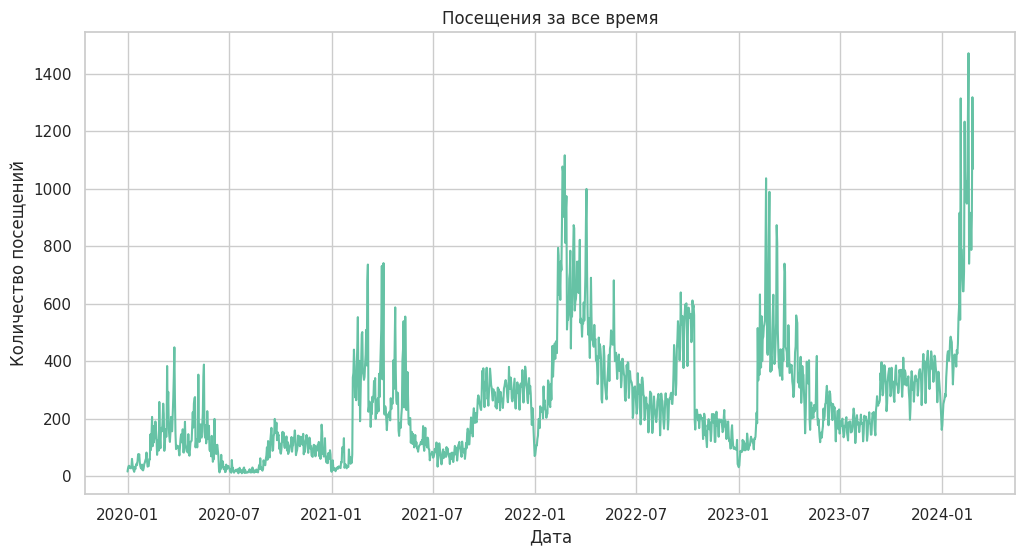

In [18]:
days = data["ym:s:dateTimeUTC"].dt.date
num_of_visits = data.groupby(days).size()

plt.figure(figsize=(12, 6))
plt.plot(num_of_visits.index, num_of_visits.values)
plt.xlabel('Дата')
plt.ylabel('Количество посещений')
plt.title('Посещения за все время')
plt.grid(True)
plt.show()

Как видим осенью и особенно весно сайт посещают много людей, в то время как в новогодние праздники и летом на сайт заходят реже.

4. Сколько уникальных пользователей в данных?

In [19]:
data["ym:s:clientID"].nunique()

162474

Как видим, всего 162 тысячи уникальных пользователей.

5. Сколько в среднем один пользователь совершил визитов? Сколько максимально?

In [20]:
users = data.groupby("ym:s:clientID").size()
users

ym:s:clientID
0                       58700
4488408704                  1
4746140180                  2
4833237738                  1
6912250029                  1
                        ...  
16768399551061526138        1
16768460461024187106        1
16768475591015842253        1
16768816421069880963        1
16910522111058091140        1
Length: 162474, dtype: int64

Значение 0 по всей видимости заглушка, в случае невозможности указать id. Уберем ее.

In [21]:
users = users.drop(0)
average_visits = users.mean()
max_vists = users.max()

print(f"В среднем каждый пользователь совершил {average_visits:.2f} визитов")
print(f"Максимальное количество визитов от одного пользователя {max_vists}")

В среднем каждый пользователь совершил 2.02 визитов
Максимальное количество визитов от одного пользователя 584


6. Постройте гистограмму глубины и продолжительности визитов.

Постороим гистограмму глубины. Это отношение общего количества просмотров страниц к количеству визитов.

In [22]:
data["ym:s:pageViews"].value_counts()

ym:s:pageViews
1      240441
2       53154
3       35769
4       18720
5        9377
        ...  
153         1
154         1
146         1
152         1
186         1
Name: count, Length: 129, dtype: int64

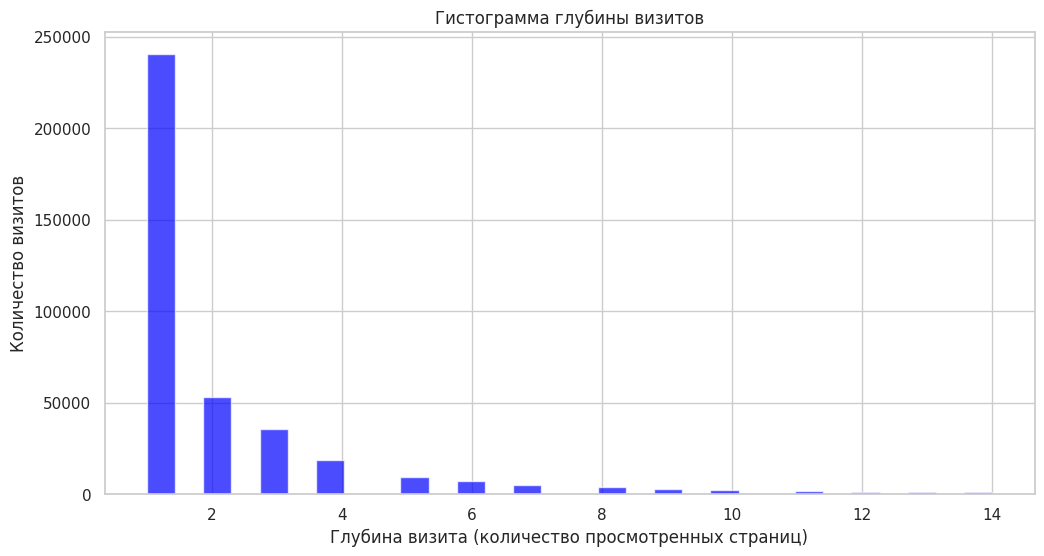

In [23]:
depth = data[data["ym:s:pageViews"] < 15]["ym:s:pageViews"]
# data["ym:s:pageViews"]

plt.figure(figsize=(12, 6))
plt.hist(depth, bins=30, color='blue', alpha=0.7)
plt.xlabel('Глубина визита (количество просмотренных страниц)')
plt.ylabel('Количество визитов')
plt.title('Гистограмма глубины визитов')
plt.grid(True)
plt.show()

Теперь построим гистограмму продолжительности посещения.

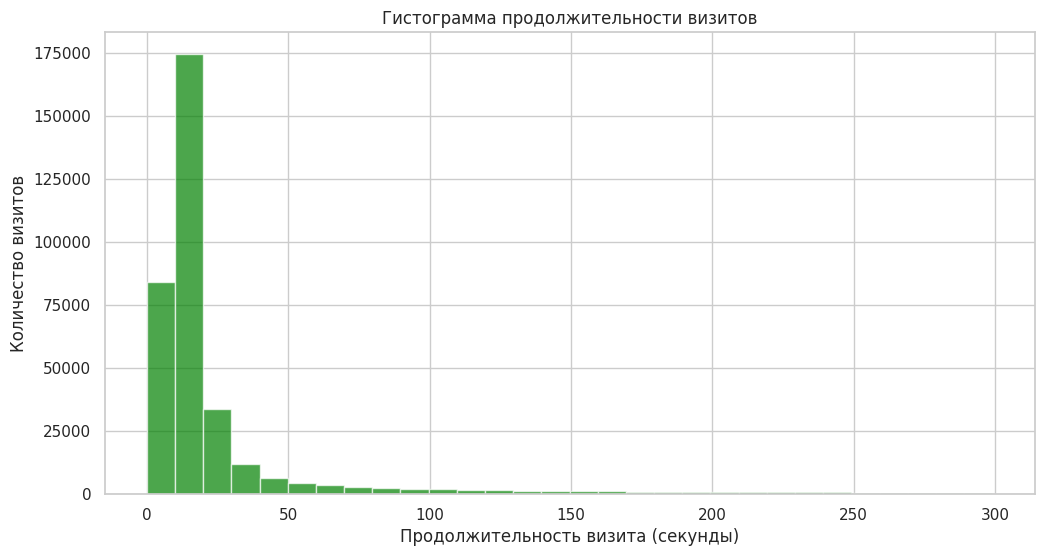

In [24]:
duration = data[data["ym:s:visitDuration"] < 300]["ym:s:visitDuration"]

plt.figure(figsize=(12, 6))
plt.hist(duration, bins=30, color='green', alpha=0.7)
plt.xlabel('Продолжительность визита (секунды)')
plt.ylabel('Количество визитов')
plt.title('Гистограмма продолжительности визитов')
plt.grid(True)
plt.show()

Как видим в среднем пользователи посещают примерно 1-2 странице и находятся на сайте менее 3 минут.

7. Из каких стран больше пользователей?

In [25]:
data["ym:s:regionCountry"].value_counts()[:10]

ym:s:regionCountry
Russia           344755
Belarus            5741
Kazakhstan         5509
Germany            3815
United States      2499
Netherlands        1661
France             1372
Kyrgyzstan         1222
Turkey             1125
Uzbekistan         1035
Name: count, dtype: int64

Исключая Россию, можно заметить, что люди часто заходят на сайт находясь у себя на Родине и часто забывают выключить vpn.

8. Какие браузеры и операционные системы в топе?

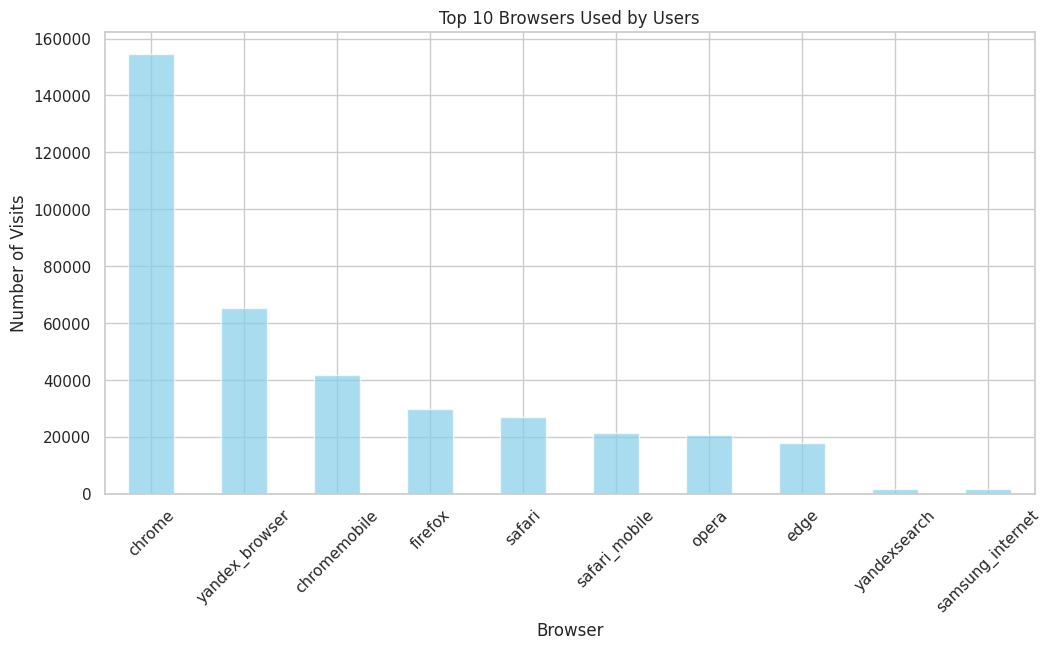

In [26]:
top_browsers = data["ym:s:browser"].value_counts().head(10)

plt.figure(figsize=(12, 6))
top_browsers.plot(kind='bar', color='skyblue', alpha=0.7)
plt.xlabel('Browser')
plt.ylabel('Number of Visits')
plt.title('Top 10 Browsers Used by Users')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

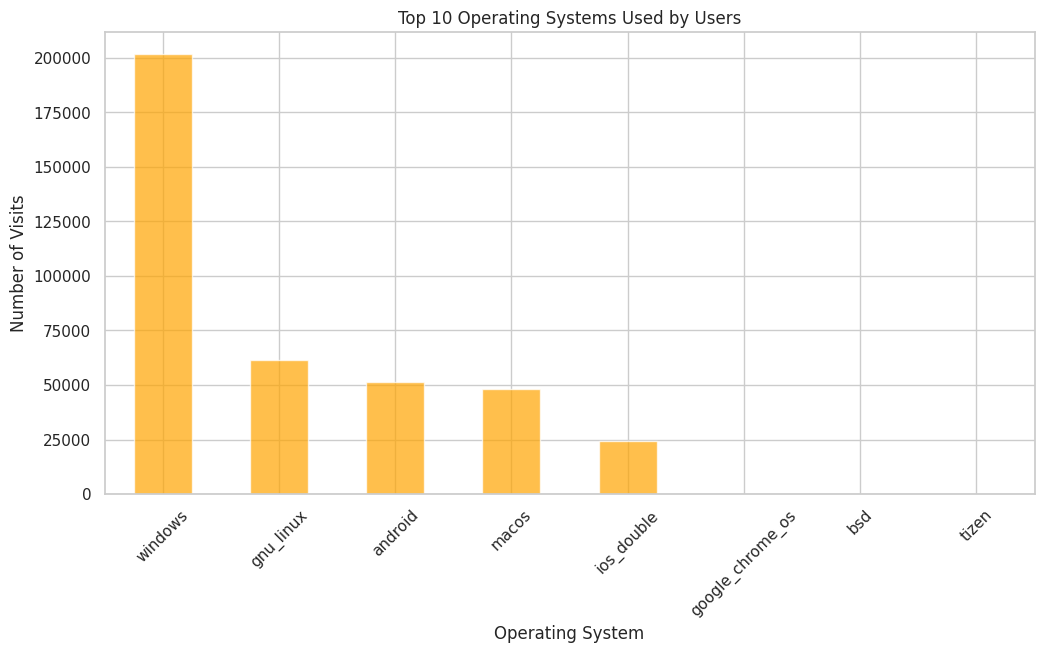

In [27]:
top_os = data["ym:s:operatingSystemRoot"].value_counts().head(10)

plt.figure(figsize=(12, 6))
top_os.plot(kind='bar', color='orange', alpha=0.7)
plt.xlabel('Operating System')
plt.ylabel('Number of Visits')
plt.title('Top 10 Operating Systems Used by Users')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

В апреле команда Физтех.Статистики планирует провести эксперимент продолжительностью 4 недели, покрасив фон всех страниц в розовый цвет, а также добавив к нему анимированных котиков и сердечек. *Гипотеза &mdash; средняя по посетителям глубина просмотра страниц вырастет на 5%.* Вам, как студентам DS-потока, предстоит задизайнить этот эксперимент. 

Выберите размеры групп на основе некоторых соображений.

Как мы увидели, активность сайта сильно зависит от сезона. Поэтому для больше репрезентативности возьмем данные за весенний семестр, ислючая май и июнь.

In [28]:
experiment_start = pd.Timestamp("2020-02-01")
experiment_end = pd.Timestamp("2023-04-30")

april_df = data[(data["ym:s:dateTimeUTC"] >= experiment_start) & (data["ym:s:dateTimeUTC"] <= experiment_end)]
april_df = april_df[april_df["ym:s:dateTimeUTC"].dt.month.isin([2, 3, 4])]
april_df.head()

,ym:s:visitID,ym:s:clientID,ym:s:dateTimeUTC,ym:s:startURL,ym:s:endURL,ym:s:pageViews,ym:s:visitDuration,ym:s:isNewUser,ym:s:bounce,ym:s:regionCountry,...,ym:s:browserCountry,ym:s:mobilePhone,ym:s:operatingSystemRoot,ym:s:browser,ym:s:browserEngine,ym:s:screenOrientation,ym:s:screenWidth,ym:s:screenHeight,ym:s:windowClientWidth,ym:s:windowClientHeight
1128,2.715963e+17,1568037737625002167,2020-02-01 02:47:37,https://mipt-stats.gitlab.io/,https://mipt-stats.gitlab.io/,3,52,0,0,Russia,...,ru,NaN,windows,chrome,WebKit,2,1366,768,1349,657
1129,2.776242e+17,1580537452838907656,2020-02-01 09:10:52,https://mipt-stats.gitlab.io/jekyll/update/201...,https://mipt-stats.gitlab.io/jekyll/update/201...,2,131,1,0,Russia,...,ru,apple,ios_double,safari_mobile,WebKit,1,320,568,320,460
1130,2.777466e+17,1577950804375545185,2020-02-01 09:18:39,https://mipt-stats.gitlab.io/,https://mipt-stats.gitlab.io/,2,56,0,0,Russia,...,gb,xiaomi,android,chromemobile,WebKit,1,360,640,360,559
1131,2.783244e+17,1580540127733882007,2020-02-01 09:55:23,https://mipt-stats.gitlab.io/,https://mipt-stats.gitlab.io/,1,0,1,1,Russia,...,ru,xiaomi,android,chromemobile,WebKit,1,393,851,393,719
1132,2.791405e+17,1580120860338802470,2020-02-01 10:47:16,https://mipt-stats.gitlab.io/jekyll/update/201...,https://mipt-stats.gitlab.io/jekyll/update/201...,1,14,0,0,Russia,...,ru,samsung,android,chromemobile,WebKit,2,1024,768,1024,648


Посмотрим на размер получившегося датафрейма.

In [29]:
april_df.shape[0]

134720

Размеры групп будем подбирать так, чтобы MDE был равен не менее 0.8.

Для этого исправим функции из первого задания, всегда добавляя эффект в 5%, и вместо этого меняя соотношения групп.

In [15]:
def add_effect(x, effect=0.05):
    """
    Функция искусственного добавления эффекта в тестовую выборку

    Аргументы:
    x -- выборка
    effect -- добавляемый эффект

    Возвращает:
    x -- выборка с добавленным эффектом
    """

    x *= 1 + effect + np.random.uniform(-effect / 5, effect / 5)
    return x

def run_experiments(
    test,
    generate_sample,
    data,
    add_effect=add_effect,
    test_control_proportions=[0],
    n_iter=10000,
    alpha=0.05,
):
    """
    Проведение серии AB-тестов:
        * либо на исторических данных data
        * либо на искусственных данных

    Аргументы:
    test -- статистический критерий
    generate_sample -- функция для семплирования/генерации выборок
    add_effect -- функция для искусственного добавления эффекта в тестовую выборку
    data -- исторические данные, на которых запускаем АА-тест.
        None, если используем искусственные данные
    effect_arr -- массив искусственно добавляемых эффектов
    n_iter -- количество итераций
    alpha -- теоретический уровень значимости

    Возвращает:
    real_alpha -- оценка уровня значимости
    left_alpha, right_alpha -- границы доверительного интервала
    """

    n_rejects = np.zeros(len(test_control_proportions))  # количество отвержений H_0
    size_of_arrs = [
        int(data.shape[0] * proportion) for proportion in test_control_proportions
    ]

    # Проведение экспериментов
    for num_effect, n in tqdm(enumerate(size_of_arrs)):
        for _ in range(n_iter):
            # Генерируем выборки
            x, y = generate_sample(data, n)
            # Добавляем эффект
            x = add_effect(x)
            # Применияем критерий
            n_rejects[num_effect] += test(x, y)[1] < alpha

    # Реальная мощность
    real_power, left_power, right_power = estimate_reject_prob(n_rejects, n_iter)
    # Отрисовка мощности
    draw_power(size_of_arrs, real_power, left_power, right_power)
    return real_power, (left_power, right_power)

def relative_ttest(x, y, alpha=0.05):
    """
    Относительный t-test.

    Аргументы:
    x, y -- выборки одинакового размера
    alpha -- уровень значимости

    Возвращает:
    stat -- статистика критерия
    pvalue
    left_bound, right_bound -- границы дов. интервала
    """

    n = len(x)
    x_mean = x.mean()
    y_mean = y.mean()

    stat = x_mean / y_mean - 1
    var = x.var() / (y_mean**2) + y.var() * (x_mean**2) / (y_mean**4)
    std = np.sqrt(var)

    z_stat = np.sqrt(n) * stat / std
    pvalue = 2 * sps.norm.sf(np.abs(z_stat))

    q = sps.norm.ppf(1 - alpha / 2)
    left_bound = stat - q * std / np.sqrt(n)
    right_bound = stat + q * std / np.sqrt(n)

    return stat, pvalue, (left_bound, right_bound)


def draw_power(effects, real_power, left_power, right_power, title="График мощности"):
    """
    Построение и отрисовка графика мощности критерия.

    Аргументы:
    effects -- сетка эффектов
    real_alpha -- оценка реальной мощности
    left_alpha, right_alpha -- границы соотв. дов. интервала
    title -- заголовок графика
    """

    plt.figure(figsize=(10, 4))
    plt.plot(effects, real_power, color="blue", label="Мощность")
    plt.fill_between(
        effects,
        left_power,
        right_power,
        alpha=0.3,
        color="blue",
        label="Дов. интервал мощности",
    )
    plt.hlines(
        0.8,
        effects[0],
        effects[-1],
        color="black",
        label="Мощность 0.8 (пересечение - MDE)",
    )
    plt.legend()
    plt.xlabel("Размер эффекта")
    plt.ylabel("Мощность")
    plt.title(title)
    plt.show()


def generate_sample_AA_test(data, n=None):
    if n is None:
        n = len(data) // 2
    data = data.sample(frac=1).reset_index(drop=True)

    first_group = data.iloc[:n]
    second_group = data.iloc[n:]

    return first_group, second_group

0it [00:00, ?it/s]

10it [16:55, 101.51s/it]


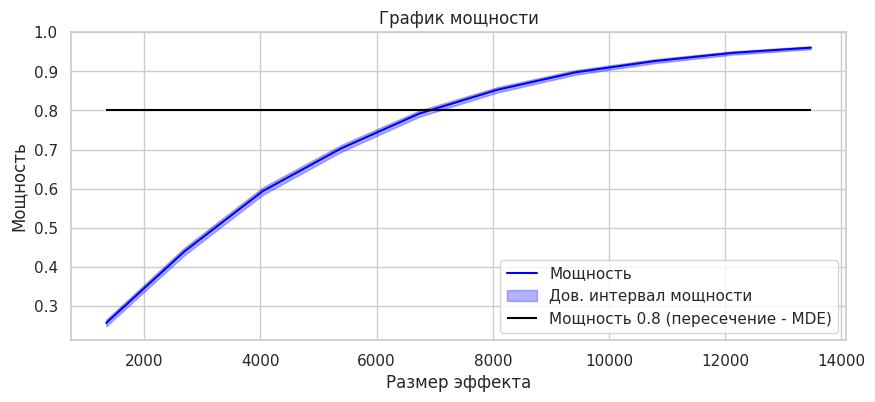

In [31]:
run_experiments(
    test=sps.ttest_ind,
    generate_sample=generate_sample_AA_test,
    data=april_df["ym:s:pageViews"],
    n_iter=10000, 
    alpha=alpha,
    test_control_proportions=np.linspace(0.01, 0.1, 10)
);

Как видим, чтобы зафиксировать желаемый эффект в тестовой группе необходимо иметь хотя бы 6000.

Для абсолютного и относительного t-test проведите валидацию по историческим данным, семплируя момент времени начала эксперимента и сами группы пользователей. В рамках валидации оцените вероятность ошибки 1 рода и мощность критериев для ожидаемого эффекта.

Следите чтобы используемые интервалы времени не выходили за границы доступных данных. Возможно, на основе проведенного ранее первичного анализа данных стоит ограничить длину исторических данных, по которой будете проводить валидацию.

Распишите подробно поэтапный алгоритм валидации:

1. Сэмплируем датасет, разбивая его на два датасета.

2. Добавляем эффект к одной из групп.

3. Для каждого датасета применяем критерий

4. По полученной статистике считаем долю отвержений

5. В конце строим доверительные интервалы и график мощности в зависимости от эффекта.

Реализуйте его

In [17]:
def AA_test(
    test, generate_sample, data=None, n_iter=10000, alpha=0.05, show_pvals=False
):
    """
    Проведение серии AA-тестов:
        * либо на исторических данных data
        * либо на искусственных данных

    Аргументы:
    test -- статистический критерий
    generate_sample -- функция для семплирования/генерации выборок
    data -- исторические данные, на которых запускаем АА-тест.
        None, если используем искусственные данные
    n_iter -- количество итераций
    alpha -- теоретический уровень значимости
    show_pvals -- показывать ли распределение p-value

    Возвращает:
    type_1_prob_est -- оценка вероятности ошибки первого рода
    left_bound, right_bound -- границы доверительного интервала
    """

    n_rejects = 0  # количество отвержений H_0
    pvals = []

    # Проведение экспериментов
    for _ in tqdm(range(n_iter)):
        # Генерируем выборки
        x, y = generate_sample(data)
        # Применияем критерий
        pvals.append(test(x, y)[1])
        n_rejects += pvals[-1] < alpha

    # Оценка вероятности ошибки первого рода
    type_1_prob_est, left_bound, right_bound = estimate_reject_prob(n_rejects, n_iter)

    # Визуализация
    figsize = (14, 3) if show_pvals else (5, 2)
    visualization(
        type_1_prob_est, left_bound, right_bound, show_pvals, pvals, alpha, figsize
    )
    return type_1_prob_est, (left_bound, right_bound)


def visualization(
    prob_reject,
    left_bound,
    right_bound,
    show_pvals=False,
    pvals=None,
    alpha=0.05,
    figsize=(7, 2),
):
    """
    Отрисовка интервала для вероятности отвержения критерия
    и гистограммы p-value (опционально)
    prob_reject -- оценка вероятности отвержения
    left_bound, right_bound -- границы доверительного интервала
    alpha -- теоретический уровень значимости
    show_pvals -- показывать ли распределение p-value
    pvals -- массив из p-value
    figsize -- размер фигуры matplotlib
    """

    # построение гистограммы p-value (опционально)
    if show_pvals:
        with sns.axes_style("darkgrid"):
            plt.figure(figsize=figsize)
            plt.subplot(1, 2, 1)
            plt.hist(
                pvals,
                bins=np.linspace(0, 1, 21),
                color="blue",
                alpha=0.4,
                weights=np.ones(len(pvals)) / len(pvals),
            )
            plt.title("Распределение p-value")

    # отрисовка интервала для вероятности отвержения критерия
    with sns.axes_style("whitegrid"):
        if show_pvals:
            plt.subplot(1, 2, 2)
        else:
            plt.figure(figsize=figsize)
        plt.hlines(0, 0, 1, color="black", lw=2, alpha=0.6)
        plt.vlines(alpha, -1, 1, color="red", lw=5, linestyle="--", alpha=0.6)
        plt.fill_between(
            [left_bound, right_bound], [0.15] * 2, [-0.15] * 2, color="green", alpha=0.6
        )
        plt.scatter(prob_reject, 0, s=300, marker="*", color="red")
        plt.xlim((min(alpha, left_bound) - 1e-3, max(alpha, right_bound) + 1e-3))
        plt.title(
            f"Доля отвержений = {100*prob_reject:.2f}%, "
            f"интервал ({100*left_bound:.2f}%, {100*right_bound:.2f}%)"
        )
        plt.ylim((-0.5, 0.5))
        plt.yticks([])
        plt.tight_layout()
        plt.show()


def estimate_reject_prob(n_rejects, n_iter):
    """
    Оценка вероятности отвержения критерия и ее дов. интервала.
    Используется для оценки вероятности ошибки первого рода и мощности

    Аргументы:
    n_rejects -- количество отвержений H_0 в эксперименте
    n_iter -- количество экспериментов

    Возвращает:
    prob_reject -- оценка вероятности отвержения критерия
    left_bound, right_bound -- границы соотв. дов. интервала
    """

    prob_reject = n_rejects / n_iter
    left_bound, right_bound = proportion_confint(n_rejects, n_iter, method="wilson")

    return prob_reject, left_bound, right_bound


def relative_ttest(x, y, alpha=0.05):
    '''
    Относительный t-test.
    
    Аргументы:
    x, y -- выборки одинакового размера
    alpha -- уровень значимости
    
    Возвращает:
    stat -- статистика критерия
    pvalue
    left_bound, right_bound -- границы дов. интервала
    '''
    
    n = len(x)
    x_mean = x.mean()
    y_mean = y.mean()
    
    stat = x_mean/y_mean - 1
    var = x.var() / (y_mean**2) \
            + y.var() * (x_mean**2) / (y_mean**4)
    std = np.sqrt(var)
    
    z_stat = np.sqrt(n) * stat / std
    pvalue = 2*sps.norm.sf(np.abs(z_stat))
    
    q = sps.norm.ppf(1 - alpha/2)
    left_bound = stat - q*std/np.sqrt(n)
    right_bound = stat + q*std/np.sqrt(n)
    
    return stat, pvalue, left_bound, right_bound

def run_experiments(test, generate_sample, add_effect, data=None, effects=[0],
            n_iter=10000, alpha=0.05):    
    '''
    Проведение серии AB-тестов:
        * либо на исторических данных data
        * либо на искусственных данных
   
    Аргументы:
    test -- статистический критерий
    generate_sample -- функция для семплирования/генерации выборок
    add_effect -- функция для искусственного добавления эффекта в тестовую выборку
    data -- исторические данные, на которых запускаем АА-тест. 
        None, если используем искусственные данные
    effect_arr -- массив искусственно добавляемых эффектов
    n_iter -- количество итераций
    alpha -- теоретический уровень значимости

    Возвращает:
    real_alpha -- оценка уровня значимости
    left_alpha, right_alpha -- границы доверительного интервала
    '''

    n_rejects = np.zeros(len(effects))  # количество отвержений H_0

    # Проведение экспериментов
    for num_effect, effect in tqdm(enumerate(effects)):
        for _ in tqdm(range(n_iter)):
            # Генерируем выборки
            x, y = generate_sample(data)
            # Добавляем эффект
            x = add_effect(x, effect)    
            # Применияем критерий
            n_rejects[num_effect] += (test(x, y)[1] < alpha)

    # Реальная мощность
    real_power, left_power, right_power = estimate_reject_prob(n_rejects, n_iter)
    # Отрисовка мощности
    draw_power(effects, real_power, left_power, right_power)
    return real_power, (left_power, right_power)


def add_effect(x, effect=0.05):
    """
    Функция искусственного добавления эффекта в тестовую выборку

    Аргументы:
    x -- выборка
    effect -- добавляемый эффект

    Возвращает:
    x -- выборка с добавленным эффектом
    """

    x *= 1 + effect + np.random.uniform(-effect / 5, effect / 5)
    return x

def draw_power(effects, real_power, left_power, right_power, title='График мощности'):
    '''
    Построение и отрисовка графика мощности критерия.
   
    Аргументы:
    effects -- сетка эффектов
    real_alpha -- оценка реальной мощности
    left_alpha, right_alpha -- границы соотв. дов. интервала
    title -- заголовок графика
    '''

    plt.figure(figsize=(10, 4))
    plt.plot(effects, real_power, color='blue', label='Мощность')
    plt.fill_between(effects, left_power, right_power, alpha=0.3, color='blue', 
                     label='Дов. интервал мощности')
    plt.hlines(0.8, effects[0], effects[-1], color='black',
               label='Мощность 0.8 (пересечение - MDE)')
    plt.legend()
    plt.xlabel('Размер эффекта')
    plt.ylabel('Мощность')
    plt.title(title)
    plt.show()

Чтобы выборка была не слишком маленькой, запретим начальной дате быть в 2024 году.

In [ ]:
def generate_sample_by_start_day(data, n=None):
    if n is None:
        n = len(data) // 2

    FORBIDDEN_DATE = pd.Timestamp("2024-01-01")
    start_date = data["ym:s:dateTimeUTC"].min()
    delta_days = (FORBIDDEN_DATE - start_date).days
    start_date = start_date + pd.Timedelta(days= np.random.randint(0, delta_days))
    data = data.sample(frac=1).reset_index(drop=True)

    first_group = data[data["ym:s:dateTimeUTC"] > start_date]["ym:s:pageViews"].iloc[:n]
    second_group = data[data["ym:s:dateTimeUTC"] > start_date]["ym:s:pageViews"].iloc[n:]

    return first_group, second_group

Проведем AA-test

Абсолютный t-test


100%|██████████| 1000/1000 [00:13<00:00, 71.82it/s]


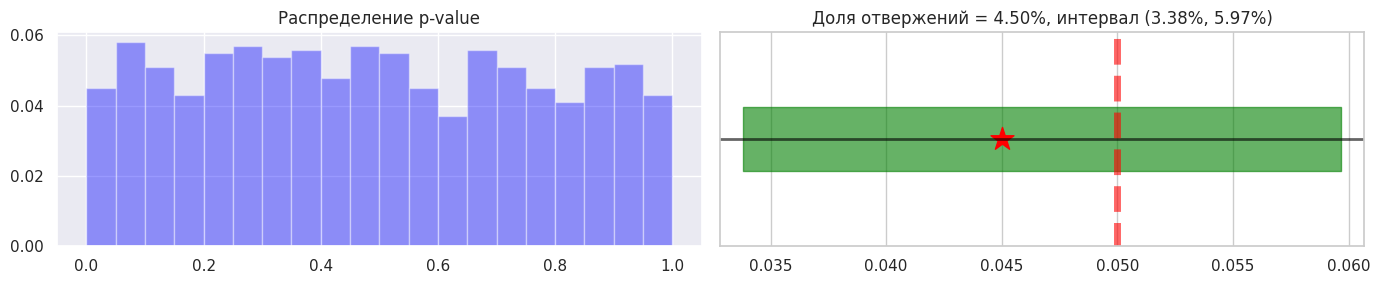

(0.045, (0.03379951228563171, 0.059682837936223455))

In [34]:
print("Абсолютный t-test")

AA_test(
    test=sps.ttest_ind,
    generate_sample=generate_sample_by_start_day,
    data=april_df[["ym:s:dateTimeUTC", "ym:s:pageViews"]],
    n_iter=1000,
    alpha=alpha,
    show_pvals=True
)

Относительный t-test


100%|██████████| 1000/1000 [00:12<00:00, 77.41it/s]


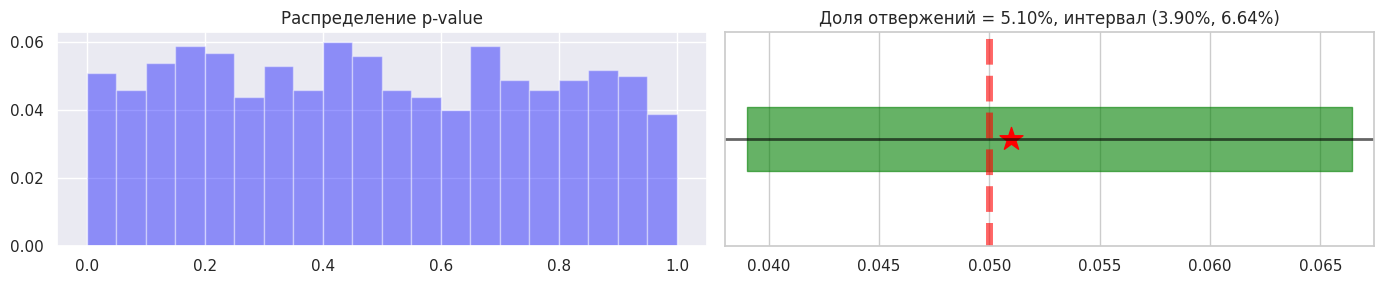

(0.051, (0.039000942775266834, 0.06643548634476167))

In [35]:
print("Относительный t-test")

AA_test(
    test=relative_ttest,
    generate_sample=generate_sample_by_start_day,
    data=april_df[["ym:s:dateTimeUTC", "ym:s:pageViews"]],
    n_iter=1000,
    alpha=alpha,
    show_pvals=True
)

Посмотрим на график мощности для абсолютного t-test.

100%|██████████| 5000/5000 [01:11<00:00, 70.29it/s]
10it [11:52, 71.29s/it]


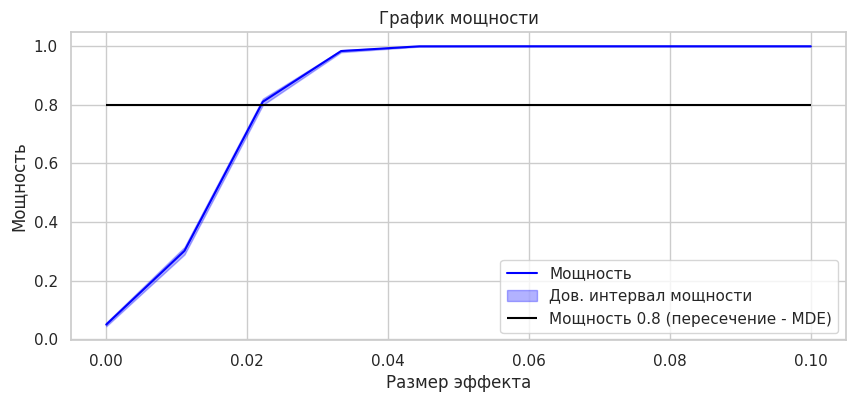

In [36]:
run_experiments(
    test=sps.ttest_ind,
    generate_sample=generate_sample_by_start_day,
    add_effect=add_effect,
    data=april_df[["ym:s:dateTimeUTC", "ym:s:pageViews"]],
    effects=np.linspace(0, 0.1, 10),
    n_iter=5000,
    alpha=0.05,
);

Теперь для относительного.

100%|██████████| 5000/5000 [00:54<00:00, 91.33it/s]
10it [09:59, 59.90s/it]


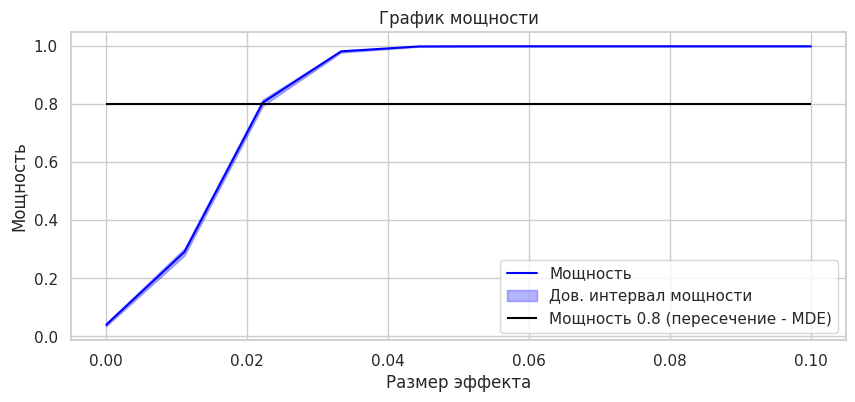

In [37]:
run_experiments(
    test=relative_ttest,
    generate_sample=generate_sample_by_start_day,
    add_effect=add_effect,
    data=april_df[["ym:s:dateTimeUTC", "ym:s:pageViews"]],
    effects=np.linspace(0, 0.1, 10),
    n_iter=5000,
    alpha=0.05,
);

Как видим, во в данном случае применим как абсолютный, так и относительный t-test.

Желаемый MDE достигается уже при эффекте в 2%.

Провалидируйте и сравните следующие подходы к уменьшению дисперсии.
1. Стратификация по операционной системе. Редко встречающиеся операционные системы можно исключить или же объединить с какой-то другой стратой.
2. CUPED со стандартной ковариатой &mdash; значение исследуемой метрики для пользователя/бакета на предэкспериментальном периоде. Однако, в этом случае у нас нет соответствующих значений для новых пользователей. В таком случае можно сделать новый категориальный признак &mdash; имеется ли у пользователя активность во время предэкспериментального периода. Для тех, у кого не было активности, значение ковариаты можно заменить на константу. Далее использовать CUPED со стратификацией по дополнительному категориальному признаку.
3. Комбинация вариантов 1 и 2.
4. Рассмотрите также добавление других ковариат в методе CUPED.
5. CUPED, с прогнозом ML-модели в качестве ковариаты, предсказывающей целевую метрику на основе имеющихся признаков.

Во всех случаях можно использовать любые реализации методов понижения дисперсии, в том числе через линейную регрессию.

Подготовимся, взяв основные функции с семинара.

In [7]:
def random_sampler(data, sample_size):
    '''
    Случайное семплирование двух групп одного размера из данных.

    :param data: исходные данные
    :param sample_size: размер группы
    :return: две группы данных
    '''

    choiced = data.sample(n=2 * sample_size)
    return choiced.iloc[:sample_size], choiced.iloc[-sample_size:]


def sample_mean_diff(data, sample_size, n_iter):
    '''
    Реализация итераций семплирования двух случайных групп и вычисления разности средних.

    :param data: исходные данные
    :param sample_size: размер группы
    :param n_iter: количество итераций семплирования
    :return: выборка разности средних
    '''

    mean_sample = np.zeros(n_iter)

    for i in tqdm(range(n_iter)):
        groups = random_sampler(data, sample_size)
        mean_sample[i] = groups[0]['sample'].mean() - groups[1]['sample'].mean()

    return mean_sample

def calculate_strata_weights(data):
    '''
    Вычисляет веса страт.
    
    :param data: исходные данные
    :return: веса страт
    '''
    
    strata_weights = data.groupby(by='strata')['sample'].count()
    strata_weights = strata_weights / strata_weights.sum()
    return strata_weights

def weighted_mean(data, weights):
    '''
    Вычисляет взвешенное среднее.

    :param data: данные
    :param weights: веса страт
    :return: взвешенное среднее
    '''

    strata_means = data.groupby(by='strata')['sample'].mean()
    return (strata_means * weights).sum()


def simple_mean(data, weights):
    '''
    Вычисляет обычное выборочное среднее

    :param data: данные
    :param weights: не используется, нужен для совместимости
    :return: выборочное среднее
    '''

    return data['sample'].mean()


def stratified_sampler(data, sample_size):
    '''
    Стратифицированное семплирование выборок.

    :param data: данные
    :param sample_size: размер выборки
    :return: две выборки
    '''

    # Веса страт
    strata_weights = calculate_strata_weights(data)

    # Размер выборок
    strata_sample_size = np.floor(sample_size * strata_weights + 0.5).astype(int)

    a_group, b_group = [], []
    # Генерируем для каждой страты отдельно
    for i, strata in enumerate(data.groupby(by='strata')):
        a, b = random_sampler(strata[1], strata_sample_size[i])
        a_group.append(a)
        b_group.append(b)

    return pd.concat(a_group), pd.concat(b_group)


def sample_mean_diff(sampler, mean_function, data, sample_size, n_iter):
    '''
    Реализация итераций семплирования двух групп и вычисления разности средних.

    :param sampler: функция семплирования двух групп
    :param mean_function: функция вычисления среднего
    :param data: исходные данные
    :param sample_size: размер группы
    :param n_iter: количество итераций семплирования
    :return: выборка разности средних
    '''

    # Веса страт
    strata_weights = calculate_strata_weights(data)

    mean_sample = np.zeros(n_iter)

    for i in tqdm(range(n_iter)):
        # Семплирование
        groups = sampler(data, sample_size)
        # Вычисление разности средних
        mean_sample[i] = mean_function(groups[0], strata_weights) - mean_function(groups[1], strata_weights)

    return mean_sample

def weighted_var(data, strata_weights):
    '''
    Вычисляет взвешенную дисперсию при стратификации.
    
    :param data: данные
    :param strata_weights: веса страт
    :return: дисперсия
    '''
    
    strata_vars = data.groupby(by='strata')['sample'].var()
    return (strata_vars * strata_weights).sum() / len(data)


def weighted_post_var(data, strata_weights):
    '''
    Вычисляет взвешенную дисперсию при постстратификации.
    
    :param data: данные
    :param strata_weights: веса страт
    :return: дисперсия
    '''
    
    strata_vars = data.groupby(by='strata')['sample'].var()
    weighted_var = (strata_vars * strata_weights).sum() / len(data)
    post_addition = (strata_vars * (1-strata_weights)).sum() / (len(data)**2)
    return weighted_var + post_addition


def simple_var(data, strata_weights):
    '''
    Вычисляет обычную дисперсию при случайном семплировании.

    :param data: данные
    :param strata_weights: веса страт, не используется, нужен для совместимости
    :return: дисперсия
    '''

    return data['sample'].var() / len(data)

def stratified_ttest(x_data, y_data, strata_weights, method='random', alpha=0.05):
    '''
    Стратифицированный абсолютный t-test.
    
    :param x_data: выборка вместе с информацией о стратах
    :param y_data: выборка вместе с информацией о стратах
    :param strata_weights: веса страт
    :param method: метод 'random', 'stratified', 'post_stratified'
    :param alpha: уровень значимости
    :return: статистика критерия, границы доверительного интервала, p-value
    '''
    
    if method == 'random':
        mean_function = simple_mean
        var_function = simple_var
    elif method == 'stratified':
        mean_function = weighted_mean
        var_function = weighted_var
    elif method == 'post_stratified':
        mean_function = weighted_mean
        var_function = weighted_post_var
        
    x_mean = mean_function(x_data, strata_weights)
    y_mean = mean_function(y_data, strata_weights)
    x_var  =  var_function(x_data, strata_weights)
    y_var  =  var_function(y_data, strata_weights)
    
    stat = x_mean - y_mean
    std = np.sqrt(x_var + y_var)
    
    t_stat = stat / std
    pvalue = 2*sps.norm.sf(np.abs(t_stat))
    
    q = sps.norm.ppf(1 - alpha/2)
    left_bound = stat - q*std
    right_bound = stat + q*std
    
    return stat, pvalue, left_bound, right_bound

def draw_interval(
    real_alpha, left_alpha, right_alpha, methods,
    alpha=0.05, figsize=(7, 2)
):
    '''
    Отрисовка интервала для реального уровня значимости
    real_alpha -- оценка уровня значимости
    left_alpha, right_alpha -- границы доверительного интервала
    methods --- список методов
    alpha -- теоретический уровень значимости
    figsize -- размер фигуры matplotlib
    '''
    
    texts = []
    
    with sns.axes_style("whitegrid"):
        plt.figure(figsize=(10, 3))
        
        for i in range(len(methods)):
            plt.hlines(-i, 0, 1, color='black', lw=2, alpha=0.6)
            plt.fill_between(
                [left_alpha[i], right_alpha[i]], [-i-0.25]*2, [-i+0.25]*2,
                color='green', alpha=0.6
            )
            plt.scatter(real_alpha[i], -i, s=300, marker='*', color='red')
            plt.xlim((min(alpha, left_alpha.min())-1e-3, max(alpha, right_alpha.max())+1e-3))
            texts.append(
                f'{methods[i]}\n'
                f'Доля отвержений = {100*real_alpha[i]:.2f}%,\n'
                f'интервал ({100*left_alpha[i]:.2f}%, {100*right_alpha[i]:.2f}%)'
            )
        plt.ylim((-len(methods)+0.65, 0.35))
        
        plt.vlines(alpha, -len(methods), 1, color='red', lw=5, linestyle='--', alpha=0.6)
        plt.yticks(-np.arange(len(methods)), texts)
        plt.tight_layout()
        plt.show()
        
def estimate_reject_prob(n_rejects, n_iter):
    '''
    Оценка вероятности отвержения критерия и ее дов. интервала.
    Используется для оценки вероятности ошибки первого рода и мощности
   
    Аргументы:
    n_rejects -- количество отвержений H_0 в эксперименте
    n_iter -- количество экспериментов
   
    Возвращает:
    prob_reject -- оценка вероятности отвержения критерия
    left_bound, right_bound -- границы соотв. дов. интервала
    '''
   
    prob_reject = n_rejects / n_iter
    left_bound, right_bound = proportion_confint(n_rejects, n_iter, method='wilson')
   
    return prob_reject, left_bound, right_bound

def run_experiments(
    data, strata_weights, sampler,
    methods=['random', 'stratified', 'post_stratified'],
    n_iter=10000, sample_size=200, alpha=0.05, effect=0, show=True
):
    '''
    Проведение серии AA-тестов на  выборках.
    
    Аргументы:
    generate_data -- функция для семплирования исходных данных
    sampler -- функция для семплирования групп
    total_size -- общий размер данных
    methods -- список методов из 'random', 'stratified', 'post_stratified'
    n_iter -- количество итераций
    sample_size -- размер выборок
    alpha -- теоретический уровень значимости
    effect -- величина эффекта
    show -- строить ли график
    '''

    n_rejects = np.zeros(len(methods))  # количество отвержений H_0

    # Проведение экспериментов
    for _ in tqdm(range(n_iter)):
        # Генерируем две группы
        x, y = sampler(data, sample_size)
        
        # Добавляем эффект, если хотим оценить мощность
        y['sample'] *= (1 + effect)
        
        # Применяем критерии
        for i in range(len(methods)):
            n_rejects[i] += stratified_ttest(x, y, strata_weights, method=methods[i])[-1] < alpha

    # Вероятность отвержения
    prob_reject = np.zeros((len(methods), 3))
    for i in range(len(methods)):
        prob_reject[i] = estimate_reject_prob(n_rejects[i], n_iter)

    if show:
        draw_interval(
            prob_reject[:, 0], prob_reject[:, 1], prob_reject[:, 2], 
            methods, alpha=alpha
        )
        
    return prob_reject

1.

Уберем chrome_os, bsd и tizen из выборки

In [39]:
os = april_df["ym:s:operatingSystemRoot"].unique()

os = [x for x in os if x not in ['bsd', 'nan', 'google_chrome_os', 'tizen', np.nan]]
os

['windows', 'ios_double', 'android', 'gnu_linux', 'macos']

In [40]:
strat_df = april_df[april_df["ym:s:operatingSystemRoot"].isin(os)]

strat_df["strata"] = april_df["ym:s:operatingSystemRoot"]
strat_df = strat_df[["strata", "ym:s:pageViews"]]
strat_df.rename(columns={"ym:s:pageViews": "sample"}, inplace=True)
strat_df.head()

,strata,sample
1128,windows,3
1129,ios_double,2
1130,android,2
1131,android,1
1132,android,1


Посмотрим на полученные веса.

In [41]:
strata_weights = calculate_strata_weights(strat_df)
strata_weights

strata
android       0.099411
gnu_linux     0.232843
ios_double    0.068198
macos         0.143777
windows       0.455772
Name: sample, dtype: float64

Посмотрим на AA-test. Будем семплировать стратифицированно.

100%|██████████| 10000/10000 [06:10<00:00, 27.01it/s]


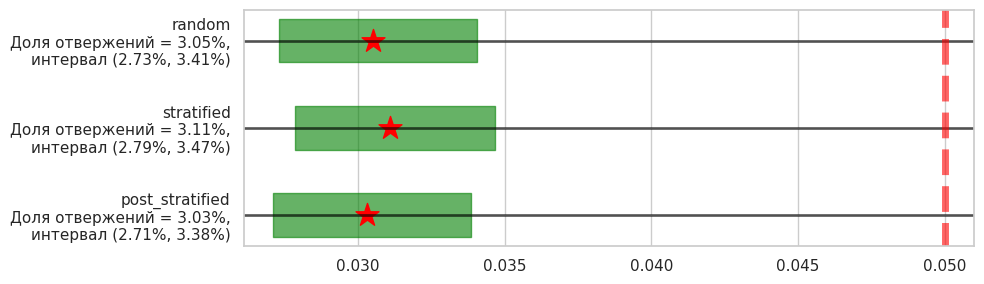

array([[0.0305    , 0.02730579, 0.03405479],
       [0.0311    , 0.02787369, 0.03468643],
       [0.0303    , 0.02711657, 0.03384416]])

In [42]:
run_experiments(
    data=strat_df,
    strata_weights=strata_weights,
    sampler=stratified_sampler,
    n_iter=10000, 
)

Теперь посмотрим на мощность.

In [43]:
effects_list = np.linspace(0, 0.7, 11)
prob_reject = np.zeros((len(effects_list), 3, 3))

for i, effect in enumerate(effects_list):
    prob_reject[i] = run_experiments(
        data=strat_df,
        strata_weights=strata_weights,
        sampler=random_sampler, 
        n_iter=10000, 
        effect=effect,
        show=False, 
    )

100%|██████████| 10000/10000 [01:45<00:00, 94.48it/s]


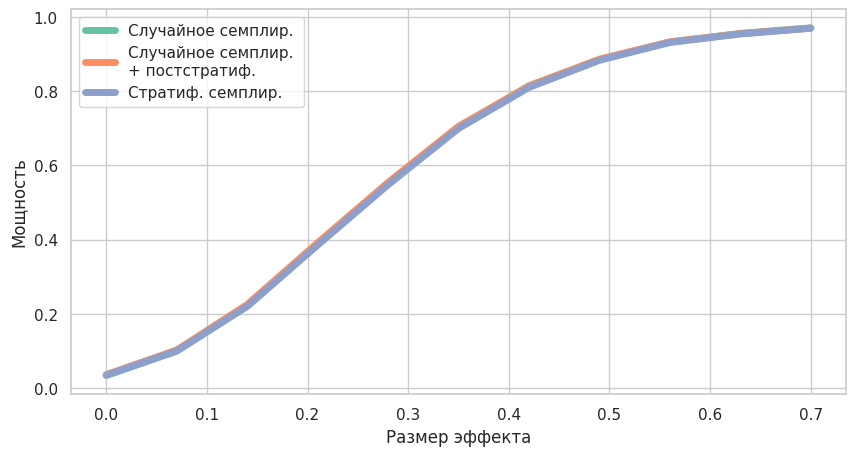

In [44]:
plt.figure(figsize=(10, 5))

labels = [
    'Случайное семплир.',
    'Случайное семплир. \n+ постстратиф.',
    'Стратиф. семплир.',
]

for i in range(3):
    plt.plot(effects_list, prob_reject[:, i, 0], lw=5, label=labels[i])
    plt.fill_between(effects_list, prob_reject[:, i, 1], prob_reject[:, i, 2], alpha=0.2)
plt.xlabel('Размер эффекта')
plt.ylabel('Мощность')
plt.legend()
plt.show()

In [29]:
def estimate_reject_prob(n_rejects, n_iter):
    """
    Оценка вероятности отвержения критерия и ее дов. интервала.
    Используется для оценки вероятности ошибки первого рода и мощности

    Аргументы:
    n_rejects -- количество отвержений H_0 в эксперименте
    n_iter -- количество экспериментов

    Возвращает:
    prob_reject -- оценка вероятности отвержения критерия
    left_bound, right_bound -- границы соотв. дов. интервала
    """

    prob_reject = n_rejects / n_iter
    left_bound, right_bound = proportion_confint(n_rejects, n_iter, method="wilson")

    return prob_reject, left_bound, right_bound


def visualization(
    prob_reject,
    left_bound,
    right_bound,
    show_pvals=False,
    pvals=None,
    alpha=0.05,
    figsize=(7, 2),
    title=None,
):
    """
    Отрисовка интервала для вероятности отвержения критерия
    и гистограммы p-value (опционально)
    prob_reject -- оценка вероятности отвержения
    left_bound, right_bound -- границы доверительного интервала
    alpha -- теор вероятность ошибки первого рода
    show_pvals -- показывать ли распределение p-value
    pvals -- массив из p-value
    figsize -- размер фигуры matplotlib
    """

    # построение гистограммы p-value (опционально)
    if show_pvals:
        with sns.axes_style("whitegrid"):
            plt.figure(figsize=figsize)
            plt.subplot(1, 2, 1)
            plt.hist(
                pvals,
                bins=np.linspace(0, 1, 21),
                alpha=0.7,
                weights=np.ones(len(pvals)) / len(pvals),
            )
            plt.title("Распределение p-value")

    # отрисовка интервала для вероятности отвержения критерия
    with sns.axes_style("whitegrid"):
        if show_pvals:
            plt.subplot(1, 2, 2)
        else:
            plt.figure(figsize=figsize)
        plt.hlines(0, 0, 1, color="black", lw=2, alpha=0.6)
        plt.vlines(alpha, -1, 1, color="red", lw=5, linestyle="--", alpha=0.6)
        plt.fill_between(
            [left_bound, right_bound], [0.15] * 2, [-0.15] * 2, color="green", alpha=0.6
        )
        plt.scatter(prob_reject, 0, s=300, marker="*", color="red")
        plt.xlim((min(alpha, left_bound) - 1e-3, max(alpha, right_bound) + 1e-3))
        plt.title(
            f"Доля отвержений = {100*prob_reject:.2f}%, "
            f"интервал ({100*left_bound:.2f}%, {100*right_bound:.2f}%)"
        )
        plt.suptitle(title)
        plt.ylim((-0.5, 0.5))
        plt.yticks([])
        plt.tight_layout()
        plt.show()


def draw_power(
    powers,
    left_powers,
    right_powers,
    effects_list=np.linspace(0, 0.1, 11),
    label=None,
    title="Графики мощности",
    new_figure=False,
):
    """
    Построение и отрисовка графика мощности критерия.

    Аргументы:
    powers -- оценка мощности (массив или список массивов/объектов)
    left_powers, right_powers -- границы соотв. доверительного интервала (массив или список)
    effects_list -- сетка эффектов
    label -- подпись графика (строка или список строк)
    title -- заголовок графика
    new_figure -- создавать новую фигуру или нет
    """

    if new_figure:
        plt.figure(figsize=(10, 4))

    # Преобразуем одиночные массивы в списки, если передали только один набор данных
    if not isinstance(powers, (list, tuple)):
        powers = [powers]
        left_powers = [left_powers]
        right_powers = [right_powers]
        label = [label] if label else [None]

    # Рисуем все переданные графики мощности
    for i, (p, lp, rp) in enumerate(zip(powers, left_powers, right_powers)):
        # Если передан объект, извлекаем из него нужные атрибуты
        if hasattr(p, "powers"):
            lp, rp = p.left_powers, p.right_powers
            p = p.powers

        plt.plot(effects_list, p, label=label[i] if label else None, lw=3)
        plt.fill_between(effects_list, lp, rp, alpha=0.3)

    if new_figure:
        plt.hlines(
            0.8,
            effects_list[0],
            effects_list[-1],
            color="black",
            alpha=0.5,
            label="Мощность 0.8 (пересечение — MDE)",
        )

    plt.legend()
    plt.xlabel("Размер относительного эффекта")
    plt.ylabel("Мощность")
    plt.title(title)


def add_effect(x, effect, target_name="pilot", relative_effect=True):
    """
    Функция искусственного добавления эффекта в тестовую выборку

    Аргументы:
    x -- выборка
    effect -- добавляемый эффект
    target_name -- имя столбца с целевой метрикой
    relative_effect -- является ли эффект относительным или абсолютным

    Возвращает:
    x -- выборка с добавленным эффектом
    """

    x_copy = x.copy()
    if relative_effect:
        x_copy[target_name] *= 1 + effect
    else:
        x_copy[target_name] += effect

    return x_copy


def run_experiments(
    test,
    data,
    generate_samples,
    n_iter=10000,
    sample_size=1000,
    effect=0,
    relative_effect=True,
    alpha=0.05,
    target_name="sample",
    draw=False,
    title=None,
    show_pvals=True,
):
    """
    Проведение серии AA-тестов на искусственных выборках.

    Аргументы:
    test -- статистический критерий
    generate_samples -- функции для семплирования выборок
    n_iter -- количество итераций
    sample_size -- размер выборок
    effect -- размер добавляемого эффекта (для оценки мощности)
    relative_effect -- является ли эффект относительным или абсолютным
    alpha -- теор вероятность ошибки первого рода
    target_name -- имя столбца с целевой метрикой
    """

    n_rejects = 0  # количество отвержений H_0
    pvals = []  # значения p-value
    # Проведение экспериментов
    for _ in tqdm(range(n_iter), leave=False):
        # Генерируем выборки
        x_data, y_data = generate_samples(data, sample_size=sample_size)

        # Добавляем эффект, если хотим оценить мощность
        x_data = add_effect(
            x_data, effect, target_name=target_name, relative_effect=relative_effect
        )

        # Применяем критерий
        pvals.append(test(x_data, y_data)[1])
        n_rejects += pvals[-1] < alpha

    # Оценка вероятности отвержения
    prob_reject, left_bound, right_bound = estimate_reject_prob(n_rejects, n_iter)

    # Визуализация
    if draw:
        figsize = (14, 3) if show_pvals else (5, 2)
        visualization(
            prob_reject,
            left_bound,
            right_bound,
            show_pvals,
            pvals,
            alpha,
            figsize,
            title,
        )

    return prob_reject, (left_bound, right_bound)


def estimate_power(
    test,
    data,
    generate_samples,
    n_iter=10000,
    sample_size=1000,
    effects_list=np.linspace(0, 0.1, 11),
    relative_effect=True,
    alpha=0.05,
    target_name="sample",
):
    """
    Проведение серии тестов на искусственных выборках для оценки мощности.

    Аргументы:
    test -- статистический критерий
    generate_samples -- функции для семплирования выборок
    n_iter -- количество итераций
    sample_size -- размер выборок
    effects_list -- список добавляемых эффектов
    relative_effect -- является ли эффект относительным или абсолютным
    alpha -- теор вероятность ошибки первого рода
    target_name -- имя столбца с целевой метрикой
    """

    powers = np.zeros(len(effects_list))
    left_bounds = np.zeros(len(effects_list))
    right_bounds = np.zeros(len(effects_list))

    for i, effect in tqdm(enumerate(effects_list), leave=False):
        powers[i], (left_bounds[i], right_bounds[i]) = run_experiments(
            test,
            data,
            generate_samples,
            n_iter=n_iter,
            sample_size=sample_size,
            effect=effect,
            relative_effect=relative_effect,
            alpha=alpha,
            target_name=target_name,
            draw=False,
        )

    return powers, left_bounds, right_bounds

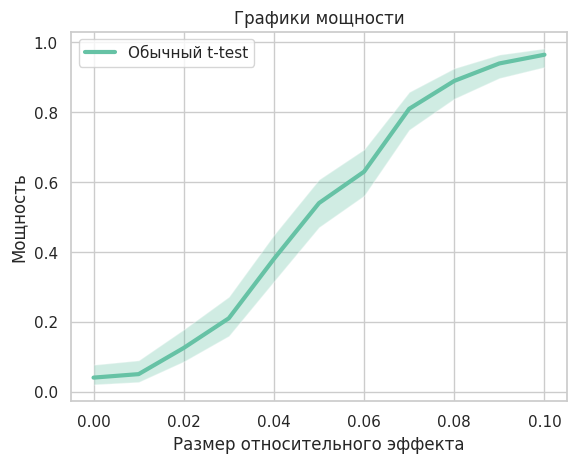

In [46]:
effects_list = np.linspace(0, 0.1, 11)

powers0, left_bounds0, right_bounds0 = estimate_power(
    test=sps.ttest_ind,
    data=strat_df.drop(columns=["strata"]),
    generate_samples=random_sampler,
    sample_size=int(strat_df.shape[0] / 20),
    n_iter=200,
    effects_list=effects_list,
)

draw_power(powers0, left_bounds0, right_bounds0, label="Обычный t-test")

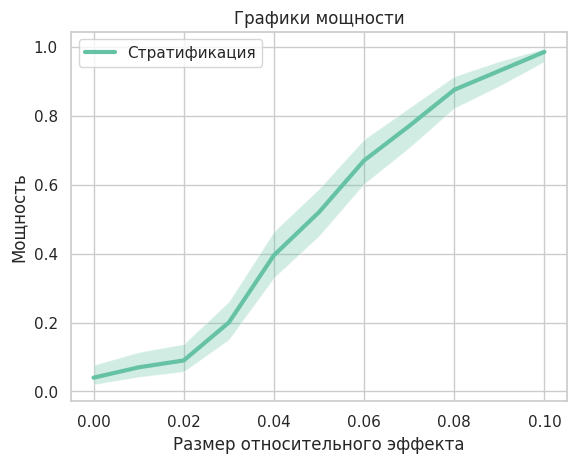

In [47]:
effects_list = np.linspace(0, 0.1, 11)

powers1, left_bounds1, right_bounds1 = estimate_power(
    test=lambda x, y: stratified_ttest(x, y, strata_weights),
    data=strat_df,
    generate_samples=stratified_sampler,
    sample_size=int(strat_df.shape[0] / 20),
    n_iter=200,
    effects_list=effects_list,
)

draw_power(powers1, left_bounds1, right_bounds1, label="Cтратификация")

2.
Предэкспериментальным периодом будем считать года до 2022 включительно.

In [48]:
end_of_pre_period = pd.Timestamp("2023-01-01")
data_before = april_df[april_df["ym:s:dateTimeUTC"] < end_of_pre_period]
data_after = april_df[april_df["ym:s:dateTimeUTC"] >= end_of_pre_period]

users_before_period = data_before.groupby("ym:s:clientID")["ym:s:pageViews"].mean()
users_before_period

ym:s:clientID
0                        2.295585
4746140180               1.000000
6912250029               4.000000
1584029738542077         3.000000
1596199917945303         1.000000
                          ...    
16513055951068949093    19.000000
16513196681041583176     1.000000
16513202991020009837     2.000000
16513276961026296602     1.000000
16513412611024607623     1.000000
Name: ym:s:pageViews, Length: 28473, dtype: float64

В качестве константы при отсутвии пользователя в предэкспериментальный период будем назначать ему среднее.

In [49]:
UNKNOWN_PAGE_VIEW = users_before_period.mean()
data_after["covariate"] = (
    data_after["ym:s:clientID"].map(users_before_period).fillna(UNKNOWN_PAGE_VIEW)
)

data_after["covariate"].value_counts()

covariate
1.874795     35689
2.295585      4276
1.000000        26
2.000000        13
6.055556         6
1.250000         4
8.000000         3
2.285714         3
2.500000         2
8.250000         2
4.625000         1
1.333333         1
3.000000         1
6.000000         1
2.089172         1
52.000000        1
3.289474         1
4.666667         1
1.285714         1
9.500000         1
3.800000         1
5.000000         1
Name: count, dtype: int64

In [50]:
data_after[data_after["covariate"] != UNKNOWN_PAGE_VIEW].shape[0]

4347

Как видим, в выборке не так много старых пользователей. Также тут есть значение 0 -- когда пользователь неопределен.

Теперь добавим страту -- был ли человек в предэкспериментальном периоде.

In [51]:
data_after["strata"] = (data_after["covariate"] != UNKNOWN_PAGE_VIEW).apply(int)

In [52]:
data_after = data_after[["ym:s:pageViews", "covariate", "strata"]]
data_after.rename(columns={"ym:s:pageViews" : "sample"}, inplace=True)

In [53]:
data_after.head()

,sample,covariate,strata
247066,1,2.295585,1
247067,1,1.874795,0
247068,2,1.874795,0
247069,1,1.874795,0
247070,1,1.874795,0


In [54]:
strata_weights = calculate_strata_weights(data_after)
strata_weights

strata
0    0.891423
1    0.108577
Name: sample, dtype: float64

Теперь поправим код для CUPED-ttest

In [8]:
def stratified_cuped_transform(
    x_data,
    y_data,
    target_name="sample",
    covariate_name="covariate",
    strata_name="strata",
    return_theta=False,
):
    """
    Выполняет CUPED-преобразование с учетом страт.

    :param x_data: данные тестовой группы (DataFrame)
    :param y_data: данные контрольной группы (DataFrame)
    :param target_name: имя столбца с целевой метрикой
    :param covariate_name: имя столбца-ковариаты
    :param strata_name: имя столбца со стратами
    :param return_theta: возвращать ли словарь значений theta по стратам
    :return: обновленные x_data и y_data с добавленным столбцом "cuped", а также theta_s (если return_theta=True)
    """
    x_data = x_data.copy()
    y_data = y_data.copy()
    theta_s = {}

    # Обрабатываем все страты из обеих групп
    strata = set(x_data[strata_name].unique()).union(set(y_data[strata_name].unique()))

    for stratum in strata:
        x_stratum = x_data[x_data[strata_name] == stratum]
        y_stratum = y_data[y_data[strata_name] == stratum]

        # Вычисляем theta на контрольной группе
        if len(y_stratum) > 1:
            cov_y = np.cov(y_stratum[target_name], y_stratum[covariate_name], ddof=0)[
                0, 1
            ]
            var_y = np.var(y_stratum[covariate_name], ddof=0)
            theta = cov_y / var_y if var_y != 0 else 0
        else:
            theta = 0

        theta_s[stratum] = theta

        # Среднее ковариаты в контрольной группе
        covariate_mean = y_stratum[covariate_name].mean() if not y_stratum.empty else 0

        # Применяем CUPED с центрированием
        if not x_stratum.empty:
            x_cuped = x_stratum[target_name] - theta * (
                x_stratum[covariate_name] - covariate_mean
            )
            x_data.loc[x_data[strata_name] == stratum, "cuped"] = x_cuped.values

        if not y_stratum.empty:
            y_cuped = y_stratum[target_name] - theta * (
                y_stratum[covariate_name] - covariate_mean
            )
            y_data.loc[y_data[strata_name] == stratum, "cuped"] = y_cuped.values

    if return_theta:
        return x_data, y_data, theta_s
    else:
        return x_data, y_data


def stratified_cuped_ttest(
    x_data,
    y_data,
    strata_weights,
    return_theta=False,
    cuped_transform=stratified_cuped_transform,
):
    """
    Абсолютный t-test.

    :param x_data: выборка вместе с информацией о cuped-преобразовании
    :param y_data: выборка вместе с информацией о cuped-преобразовании
    :param strata_weights: веса страт
    :param target_name: имя столбца с целевой метрикой
    :param covariate_name: имя столбца-ковариаты
    :param strata_name: имя столбца со стратами
    :param alpha: теор вероятность ошибки первого рода
    :return: статистика критерия, p-value
    """

    x_data, y_data = cuped_transform(
        x_data,
        y_data,
    )

    x_data = x_data.drop(columns=["sample", "covariate"], axis=1)
    y_data = y_data.drop(columns=["sample", "covariate"], axis=1)

    x_data.rename(columns={"cuped": "sample"}, inplace=True)
    y_data.rename(columns={"cuped": "sample"}, inplace=True)

    return stratified_ttest(x_data, y_data, strata_weights)

Проведем AA-тест

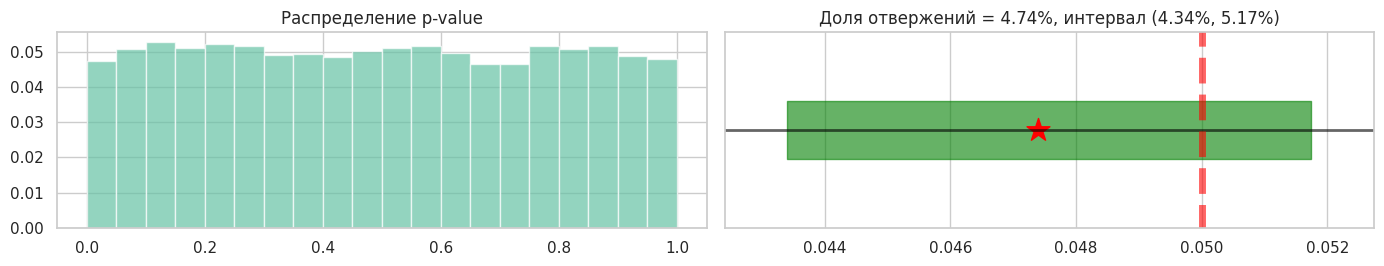

(0.0474, (0.04340618728991059, 0.051741408035225846))

In [56]:
run_experiments(
    test=lambda x, y: stratified_cuped_ttest(x, y, strata_weights),
    data=data_after,
    generate_samples=stratified_sampler,
    sample_size=data_after.shape[0] // 20,
    n_iter=10000,
    draw=True,
)

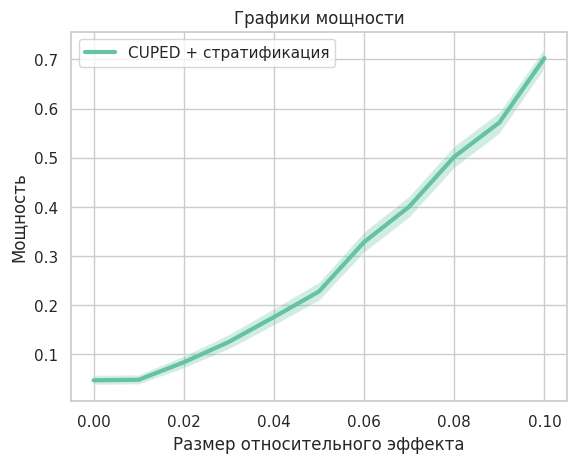

In [57]:
effects_list = np.linspace(0, 0.1, 11)

powers2, left_bounds2, right_bounds2 = estimate_power(
    test=lambda x, y: stratified_cuped_ttest(x, y, strata_weights),
    data=data_after,
    generate_samples=stratified_sampler,
    sample_size=int(data_after.shape[0] / 20),
    n_iter=2000,
    effects_list=effects_list,
)

draw_power(powers2, left_bounds2, right_bounds2, label="CUPED + стратификация")

3.
Объединим первые два пунккта, то есть стратификация будет по системе и наличию посещения в преэкспериментальный период.

In [58]:
end_of_pre_period = pd.Timestamp("2023-01-01")

data_before = april_df[(april_df["ym:s:dateTimeUTC"] < end_of_pre_period) & (april_df["ym:s:operatingSystemRoot"].isin(os))]
data_after = april_df[(april_df["ym:s:dateTimeUTC"] >= end_of_pre_period) & (april_df["ym:s:operatingSystemRoot"].isin(os))]

users_before_period = data_before.groupby("ym:s:clientID")["ym:s:pageViews"].mean()

data_after["covariate"] = (
    data_after["ym:s:clientID"].map(users_before_period).fillna(UNKNOWN_PAGE_VIEW)
)

data_after[data_after["covariate"] != UNKNOWN_PAGE_VIEW].shape[0]

4347

In [59]:
data_after["pre_exper"] = (data_after["covariate"] != UNKNOWN_PAGE_VIEW).apply(int)

data_after = data_after = data_after[["ym:s:pageViews", "covariate", "ym:s:operatingSystemRoot", "pre_exper"]]

In [60]:
data_after["strata"] = (
    data_after["ym:s:operatingSystemRoot"] + "_" + data_after["pre_exper"].apply(str)
)
data_after = data_after[["ym:s:pageViews", "covariate", "strata"]]
data_after.rename(columns={"ym:s:pageViews": "sample"}, inplace=True)

In [61]:
strata_weights = calculate_strata_weights(data_after)

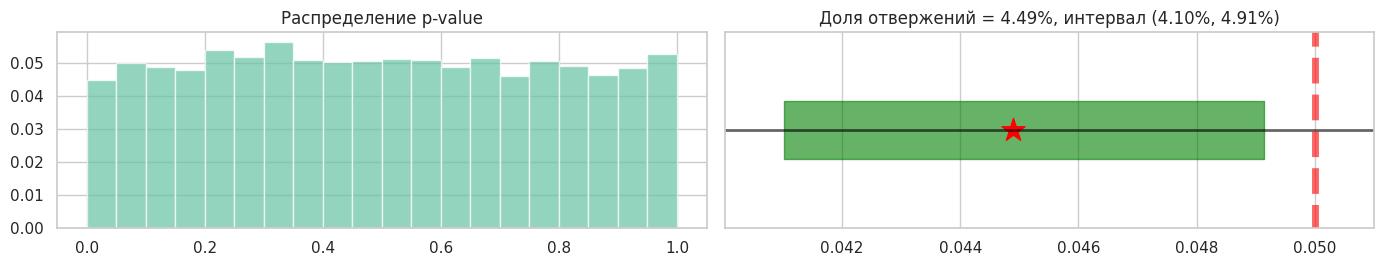

(0.0449, (0.04101299418343707, 0.04913652113355277))

In [62]:
run_experiments(
    test=lambda x, y: stratified_cuped_ttest(x, y, strata_weights),
    data=data_after,
    generate_samples=stratified_sampler,
    sample_size=data_after.shape[0] // 20,
    n_iter=10000, 
    draw=True,
)

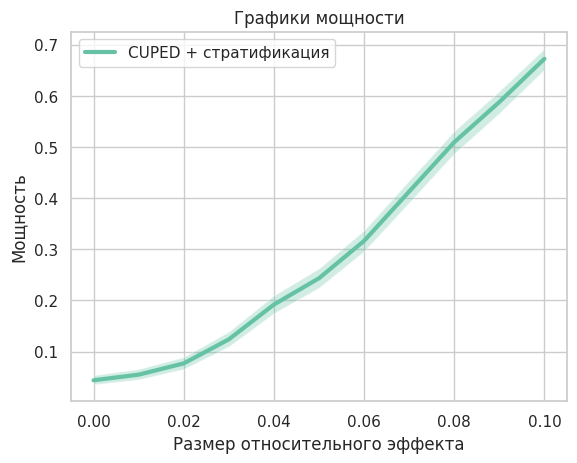

In [63]:
effects_list = np.linspace(0, 0.1, 11)

powers3, left_bounds3, right_bounds3 = estimate_power(
    test=lambda x, y: stratified_cuped_ttest(x, y, strata_weights),
    data=data_after,
    generate_samples=stratified_sampler,
    sample_size=int(data_after.shape[0] / 20),
    n_iter=2000, 
    effects_list=effects_list,
)

draw_power(powers3, left_bounds3, right_bounds3, label="CUPED + стратификация")

4. В качестве дополнительной ковариаты рассмотрим среднюю продолжительность нахождения пользователя на сайте


In [64]:
end_of_pre_period = pd.Timestamp("2023-01-01")

data_before = april_df[(april_df["ym:s:dateTimeUTC"] < end_of_pre_period) & (april_df["ym:s:operatingSystemRoot"].isin(os))]
data_after = april_df[(april_df["ym:s:dateTimeUTC"] >= end_of_pre_period) & (april_df["ym:s:operatingSystemRoot"].isin(os))]


users_before_period_pageview = data_before.groupby("ym:s:clientID")["ym:s:pageViews"].mean()

data_after["covariate_1"] = (
    data_after["ym:s:clientID"].map(users_before_period_pageview).fillna(UNKNOWN_PAGE_VIEW)
)

UNKNOWN_DURATION = data_before.groupby("ym:s:clientID")["ym:s:visitDuration"].mean().mean()

users_before_period_duration = data_before.groupby("ym:s:clientID")["ym:s:pageViews"].mean()

data_after["covariate_2"] = (
    data_after["ym:s:clientID"].map(users_before_period_duration).fillna(UNKNOWN_DURATION)
)

In [65]:
data_after["pre_exper"] = (data_after["covariate_1"] != UNKNOWN_PAGE_VIEW).apply(int)

data_after["strata"] = data_after["pre_exper"]
data_after = data_after[["ym:s:pageViews", "covariate_1", "covariate_2", "strata"]]
data_after.rename(columns={"ym:s:pageViews": "sample"}, inplace=True)

In [66]:
data_after.head()

,sample,covariate_1,covariate_2,strata
247066,1,2.295585,2.295585,1
247067,1,1.874795,108.177130,0
247068,2,1.874795,108.177130,0
247069,1,1.874795,108.177130,0
247070,1,1.874795,108.177130,0


Добавим в двухшаговый CUPED коснтанту завсящую от страты.

In [67]:
def regression_ttest_two_step_comb(
    x_data,
    y_data,
    sample_name="sample",
    treatment_name="treatment",
    covariate_names=[],
    strata_name=None,
    strata_weights=None,
):
    """
    T-test с CUPED и стратификацией через линейную регрессию.

    :param x_data: данные тестовой группы (DataFrame)
    :param y_data: данные контрольной группы (DataFrame)
    :param sample_name: имя столбца с целевым признаком
    :param treatment_name: имя столбца с индикатором теста
    :param covariate_names: список имен ковариат
    :param strata_name: имя столбца со стратами (опционально)
    :param strata_weights: словарь весов страт {stratum: weight} (опционально)
    :return: stat, pvalue, left_bound, right_bound
    """

    # Объединяем данные
    x_data = x_data.copy()
    y_data = y_data.copy()
    x_data[treatment_name] = 1
    y_data[treatment_name] = 0
    data = pd.concat([x_data, y_data]).reset_index(drop=True)

    # Добавляем веса страт (если заданы)
    if strata_weights is not None and strata_name is not None:
        data["_weight"] = data[strata_name].map(strata_weights)

    # Формула для первой регрессии (CUPED)
    formula_base = f"{sample_name} ~ {treatment_name}"
    if len(covariate_names) > 0:
        formula_base += " + " + " + ".join(covariate_names)
    if strata_name is not None:
        formula_base += f" + C({strata_name})"  # Фиксированные эффекты страт

    # Обучаем первую модель
    if strata_weights is not None and strata_name is not None:
        first_model = ols(formula_base, data=data, weights=data["_weight"]).fit(
            cov_type="HC3"
        )
    else:
        first_model = ols(formula_base, data=data).fit(cov_type="HC3")

    # Получаем theta для CUPED
    theta = first_model.params[covariate_names[0]] if len(covariate_names) > 0 else 0
    data["cuped"] = data[sample_name] - theta * data[covariate_names[0]]

    # Формула для второй регрессии (с учетом страт)
    formula_final = f"cuped ~ {treatment_name}"
    if strata_name is not None:
        formula_final += f" + C({strata_name})"

    # Обучаем вторую модель
    if strata_weights is not None and strata_name is not None:
        second_model = ols(formula_final, data=data, weights=data["_weight"]).fit(
            cov_type="HC3"
        )
    else:
        second_model = ols(formula_final, data=data).fit(cov_type="HC3")

    # Извлекаем результаты
    second_summary = second_model.summary2().tables[1]
    stat = second_summary.loc[treatment_name, "z"]
    pvalue = second_summary.loc[treatment_name, "P>|z|"]
    left_bound = second_summary.loc[treatment_name, "[0.025"]
    right_bound = second_summary.loc[treatment_name, "0.975]"]

    return stat, pvalue, left_bound, right_bound

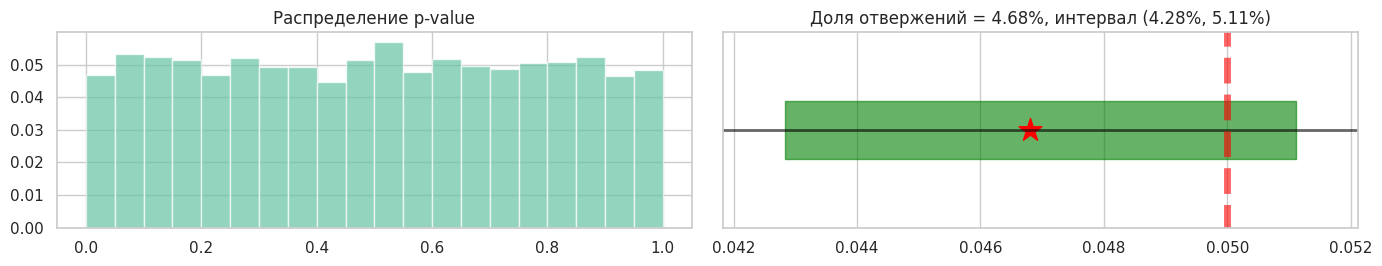

(0.0468, (0.042831521462622445, 0.051116534660558814))

In [68]:
run_experiments(
    test=lambda x, y: regression_ttest_two_step_comb(x, y, covariate_names=["covariate_1", "covariate_2"]),
    data=data_after,
    generate_samples=stratified_sampler,
    sample_size=data_after.shape[0] // 20,
    n_iter=10000, 
    draw=True,
)

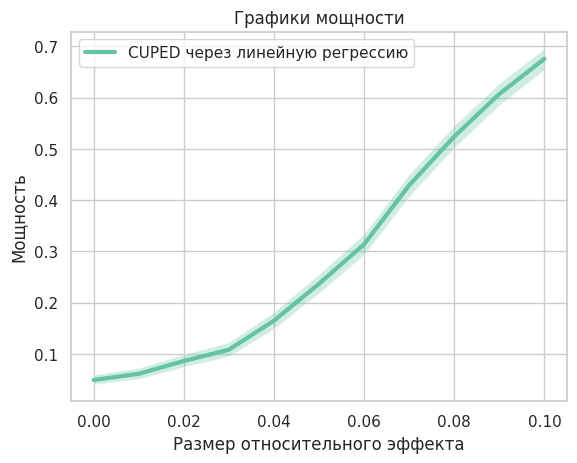

In [69]:
effects_list = np.linspace(0, 0.1, 11)

powers4, left_bounds4, right_bounds4 = estimate_power(
    test=lambda x, y: regression_ttest_two_step_comb(x, y, covariate_names=["covariate_1", "covariate_2"]),
    data=data_after,
    generate_samples=stratified_sampler,
    sample_size=int(data_after.shape[0] / 20),
    n_iter=2000,
    effects_list=effects_list,
)

draw_power(powers4, left_bounds4, right_bounds4, label="CUPED через линейную регрессию")

5. В качестве ML-модели возьмем XGBoosting.

In [70]:
end_of_pre_period = pd.Timestamp("2023-01-01")

data_before = april_df[(april_df["ym:s:dateTimeUTC"] < end_of_pre_period) & (april_df["ym:s:operatingSystemRoot"].isin(os))]
data_after = april_df[(april_df["ym:s:dateTimeUTC"] >= end_of_pre_period) & (april_df["ym:s:operatingSystemRoot"].isin(os))]

users_before_period = data_before.groupby("ym:s:clientID")["ym:s:pageViews"].mean()

In [71]:
X_train = data_before.drop(columns=["ym:s:pageViews", "ym:s:clientID"])
X_train = data_before[
    [
        "ym:s:visitDuration",
        "ym:s:isNewUser",
        "ym:s:bounce",
        "ym:s:regionCountry",
        "ym:s:networkType",
        "ym:s:operatingSystemRoot",
        "ym:s:browser",
    ]
]
X_test = data_after[
    [
        "ym:s:visitDuration",
        "ym:s:isNewUser",
        "ym:s:bounce",
        "ym:s:regionCountry",
        "ym:s:networkType",
        "ym:s:operatingSystemRoot",
        "ym:s:browser",
    ]
]

y_train = data_before["ym:s:pageViews"]

In [72]:
model = XGBRegressor()
# Convert categorical features to numerical
for col in ['ym:s:regionCountry', 'ym:s:networkType', 'ym:s:operatingSystemRoot', 'ym:s:browser']:
    oe = OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value=-1)
    X_train[col] = oe.fit_transform(X_train[[col]].astype(str))
    X_test[col] = oe.transform(X_test[[col]].astype(str))

model.fit(X_train, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [73]:
predictions = model.predict(X_test)
data_after["covariate"] = predictions

In [74]:
data_after = data_after[["ym:s:pageViews", "covariate"]]
data_after.rename(columns={"ym:s:pageViews": "sample"}, inplace=True)

In [75]:
data_after.info()

<class 'pandas.core.frame.DataFrame'>
Index: 40027 entries, 247066 to 287101
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   sample     40027 non-null  int64  
 1   covariate  40027 non-null  float32
dtypes: float32(1), int64(1)
memory usage: 781.8 KB


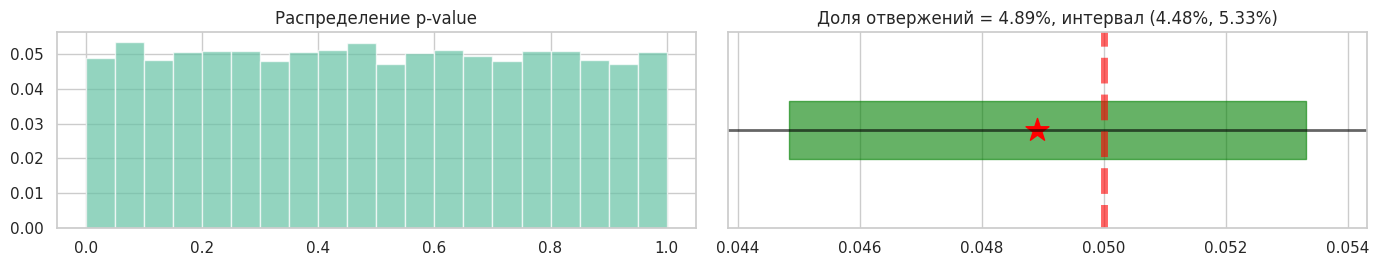

(0.0489, (0.044843646588557176, 0.053302796741467234))

In [76]:
run_experiments(
    test=lambda x, y: regression_ttest_two_step_comb(x, y, covariate_names=["covariate"]),
    data=data_after,
    generate_samples=random_sampler,
    sample_size=data_after.shape[0] // 20,
    n_iter=10000, 
    draw=True,
)

In [77]:
powers5, left_bounds5, right_bounds5 = estimate_power(
    test=lambda x, y: regression_ttest_two_step_comb(x, y, covariate_names=["covariate"]),
    data=data_after,
    generate_samples=random_sampler,
    sample_size=int(data_after.shape[0] // 20),
    n_iter=2000,
    effects_list=effects_list,
)

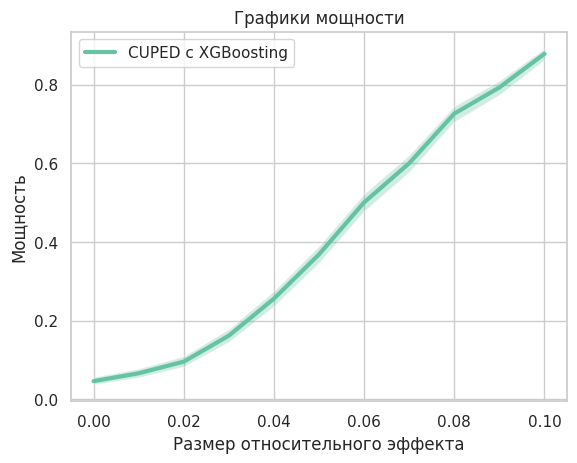

In [78]:
draw_power(powers5, left_bounds5, right_bounds5, label=["CUPED с XGBoosting"])

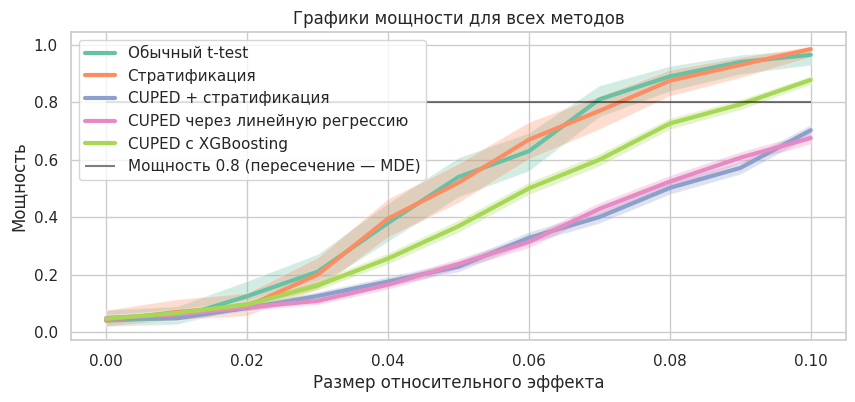

In [79]:
labels = [
    "Обычный t-test",
    "Cтратификация",
    "CUPED + стратификация",
    "CUPED через линейную регрессию",
    "CUPED с XGBoosting"
]

draw_power(
    [powers0, powers1, powers2, powers4, powers5],
    [left_bounds0, left_bounds1, left_bounds2, left_bounds4, left_bounds5],
    [right_bounds0, right_bounds1, right_bounds2, right_bounds4, right_bounds5],
    effects_list=effects_list,
    label=labels,
    title="Графики мощности для всех методов",
    new_figure=True
)

Сделайте выводы.

**Выводы**

Как видим стратифицированный t-test оказался по мощности на одном уровне с обычным, в то время как применение CUPED напротив снизило мощность критерия, что странно. С одной стороны это может быть свяазано с тем, что люди в разных стратах вообще говоря не были независимы, так как их поведение обусловлено заданиями с DS потока.

Среди CUPED методов наиболее хорощо себя показал CUPED + XGBoosting, что говорит о том, что предсказанные ковариаты оказались полезны для предсказания модели.

В конце отметим, что все предложенно алгоритмы поддерживали уровень значимости в 5%.

## Стратификация

---
### Задача 3.

Пусть в общей совокупности данных имеется $K$ страт, причем вес страты $k \in \{1, ..., K\}$ равен $w_k$, где $w_1+...+w_K=1$. Пусть также выборка размера $n$ выбрана случайно, то есть вероятность выбрать элемент из страты $k$ равна $w_k$.

Посчитайте $\mathsf{E} \frac{1}{n_k}$ с точностью до $o(1/n^2)$, где $n_k$ &mdash; количество элементов выборки из страты $k$.

*Указание.* Разложите по Тейлору функцию $f(x)=1/x$ в точке $x_0\not=0$.

$\square$

Заметим, $n_k \sim Bin(n, \omega_k)$. Будем раскладывать $\frac{1}{n_k}$ в точке $En_k = n\omega_k = n_0$

Тогда:
$$
\frac{1}{n_k} = \frac{1}{n_0} - \frac{1}{n_0^2}(n_k - n_0) + \frac{1}{n_0^3}(n_k - n_0)^2 - \frac{1}{2 \eta}\frac{(n_k - n_0)^3 }{n_0^4}
$$

В худшем случае $\eta = n \cdot \omega_k$

Так как $En_k = n \omega_k, Dn_k = n \omega_k (1  \omega_k)$, то по ЦПТ $n_k - n_0 \sim O\sqrt{(n)}$

Откуда:

$$
E\frac{1}{n_k} = \frac{1}{n_0} - \frac{1}{n_0^2}(n_0 - n_0) + \frac{D(n_k)}{n_0^3} + o(1 / n^2) = \frac{1}{n_0} + \frac{n_0 \cdot (1 - \omega_k)}{n_0^3} + o(1 / n^2) = \boxed{\frac{\omega_k(n-1) + 1}{n^2 \omega_k^2}}
$$

Внизу небольшой числовой эксперимент

$\blacksquare$


In [ ]:
import numpy as np
from math import factorial

p = 0.333
N = 100
results = []
for _ in range(100000):
    X = np.random.binomial(1, p=p, size=N)
    results.append(1 / np.sum(X))

theory_result = np.pow(1 - p, N)
for l in range(1, N):
    theory_result += (
        factorial(N)
        / (factorial(l) * factorial(N - l))
        * np.pow(p, l)
        * np.pow(1 - p, N - l)
    ) / l

theory_result = (p * (N - 1) + 1) / (N * N * p * p)
print("Практика: ", np.mean(results))
print("Теория: ", theory_result)
print("Разница: ", (np.mean(results) - theory_result) < 1 / np.pow(N, 2))

---
### Задача 4.

Пусть $Y_1, ..., Y_n$ &mdash; выборка целевого признака, а $X_1, ..., X_n$ &mdash; соответствующая выборка ковариат. Пусть также все объекты делятся на $K$ страт. Получите формулу значения $\theta$ в методе CUPED при использовании стратифицированного среднего в случае
* стратифицированного семплирования,
* случайного семплирования.

$\square$

2) Cлучайное сэмплирование.

Далее, всюда нижний индекс у Y и X будет обозначать страту, к которой они принадлежат.

Пусть $\{\omega_j\}^K_{j=1}$ -- веса страт


Запишем стандартную процедуру CUPED, c учетом стратифицированного среднего.

$z = \sum\limits^{K}_{j=1} \omega_j \overline{Y_j} - \theta \left(\sum\limits^{K}_{j=1}\omega_j \overline{X_j} - \sum\limits^{K}_{j=1} \omega_j \mu_j\right)$

Тогда
\begin{align*}
Dz =& D\sum\limits^{K}_{j=1}\omega_j (\overline{Y_j} - \theta \overline{X_j}) \\
=& \sum\limits^{K}_{j, i=1} \omega_j \omega_i \text{cov}(\overline{Y_j} - \theta \overline{X_j}, \overline{Y_i} - \theta \overline{X_i}) \\
=& \theta^2 \sum\limits^{K}_{j, i=1}\omega_j \omega_i \text{cov}({\overline{X_j}, \overline{X_i}}) - \\
-& 2\theta \sum\limits^{K}_{j, i=1}\omega_j \omega_i \text{cov}({\overline{X_j}, \overline{Y_i}}) + \\
+& \sum\limits^{K}_{j, i=1}\omega_j \omega_i \text{cov}({\overline{Y_j}, \overline{Y_i}}) 
\end{align*}

Откуда:
$$
\theta_{\min} = \frac{\sum\limits^{K}_{j,i=1} \omega_j \omega_i \, \text{cov}(\overline{X_j}, \overline{Y_i})}{\sum\limits^{K}_{j,i=1} \omega_j \omega_i \, \text{cov}(\overline{X_j}, \overline{X_i})}
$$

Считая, что элементы из разных страт независимы, получим:
$$
\boxed{
\theta_{min} = \frac{\sum\limits^{K}_{j=1}\omega_j^2 \text{cov}({\overline{X_j}, \overline{Y_j}})}{\sum\limits^{K}_{j}\omega_j^2 \text{cov}({\overline{X_j}, \overline{X_j}})} 
= \frac{\sum\limits^{K}_{j=1}\frac{\omega_j^2}{n_j} \text{cov}(X_j^1, Y_j^1)}{\sum\limits^{K}_{j}\frac{\omega_j^2}{n_j} D(X_j^1)} 
}
$$

В случае случайного сэмплирования $\omega_j$ -- доля элементов j-й страты в выборке

1. Стратифицированное сэмплирование.

Заметим, что в виду стратифицированного сэмплирования $\omega_j = \frac{n_j}{n}$. Тогда ответ можно упростить:.

$$
\boxed{
\theta_{min} = \frac{\sum\limits^{K}_{j=1}\omega_j^2 \text{cov}({\overline{X_j}, \overline{Y_j}})}{\sum\limits^{K}_{j}\omega_j^2 \text{cov}({\overline{X_j}, \overline{X_j}})} 
= \frac{\sum\limits^{K}_{j=1}{\omega_j n} \cdot \text{cov}(X_j^1, Y_j^1)}{\sum\limits^{K}_{j}\omega_j n \cdot D(X_j^1)}
=\frac{\sum\limits^{K}_{j=1}{\omega_j } \cdot \text{cov}(X_j^1, Y_j^1)}{\sum\limits^{K}_{j}\omega_j \cdot D(X_j^1)}
}
$$
$\blacksquare$

---
### Задача 5.

Рассмотренные нами методы стратификации работают в случае стратифицированного семплирования, либо же случайного семплирования. Во втором случае метод называется постстратификацией. Однако, как мы видели на занятии, при наличии сильных перекосов в соотношении между стратами вероятность ошибки 1 рода может сильно увеличиваться.

Промоделируйте распределение разности 
* обычного среднего
* стратифицированного среднего

при наличии сильных перекосов в соотношении между стратами и проинтерпретируйте результаты.

Код для семплирования перекошенных данных и для семплирования разности средних есть в ноутбуке с занятия.

In [16]:
def generate_data(size, p=0.6, shift=5, scale_factor=1):
    '''
    Генерация общего объема данных.

    :param size: размер данных
    :param p: вероятность 1-й страты
    :param shift: смещение 1-й страты
    :param scale_factor: множитель масштаба 1-й страты
    :return: сгенерированные данные
    '''

    data = pd.DataFrame()
    data['strata'] = sps.bernoulli(p=p).rvs(size=size)
    data['sample'] = sps.norm.rvs(size=size) * (1 + scale_factor * data['strata']) \
                        + shift*data['strata']
    return data

In [18]:
total_size = 10_000  # Общее количество объектов в данных
sample_size = 200  # Размер выборки
n_iter = 5000  # Количество итераций семплирования

lw = 5  # Толщина линий на графиках

data = generate_data(total_size, p=0.01)

means_random = sample_mean_diff(random_sampler, simple_mean, data, sample_size, n_iter) # обычное среднее
means_random_st = sample_mean_diff(random_sampler, weighted_mean, data, sample_size, n_iter) # стратифицированное среднее

  0%|          | 0/5000 [00:00<?, ?it/s]

100%|██████████| 5000/5000 [00:14<00:00, 336.60it/s]


Как видим, в случае когда в данных большой перекос распределение разностей совпадает

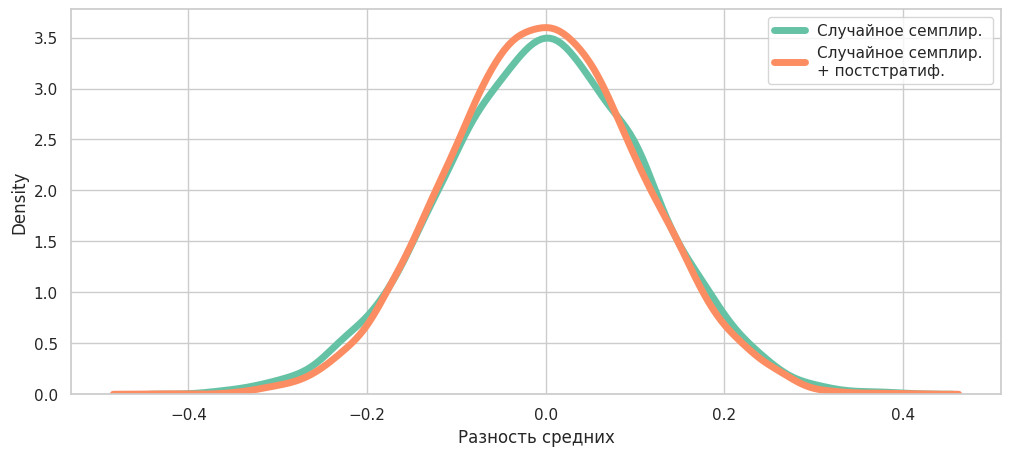

In [19]:
labels = [
    'Случайное семплир.',
    'Случайное семплир. \n+ постстратиф.',
]

plt.figure(figsize=(12, 5))
sns.kdeplot(means_random, lw=lw, label=labels[0])
sns.kdeplot(means_random_st, lw=lw, label=labels[1])
plt.xlabel('Разность средних')
plt.legend();

100%|██████████| 5000/5000 [00:15<00:00, 320.48it/s]


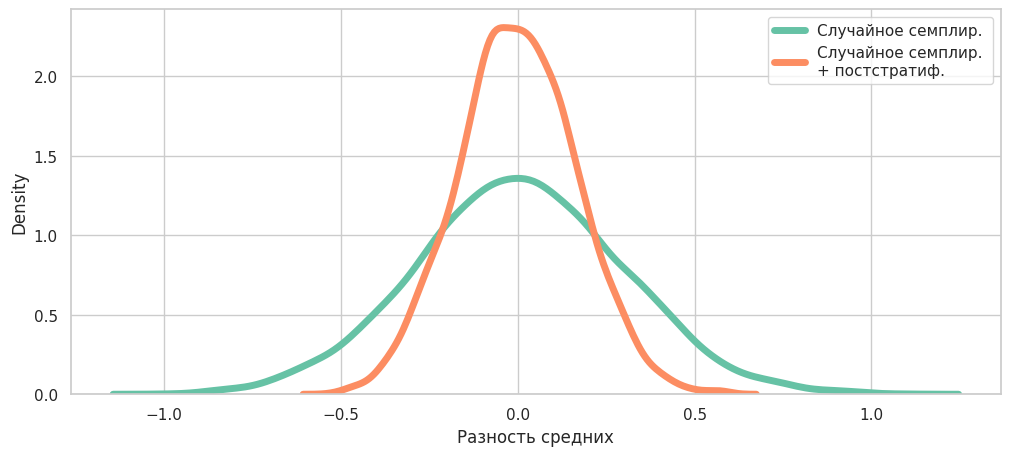

In [20]:
data = generate_data(total_size)

means_random = sample_mean_diff(random_sampler, simple_mean, data, sample_size, n_iter) # обычное среднее
means_random_st = sample_mean_diff(random_sampler, weighted_mean, data, sample_size, n_iter) # стратифицированное среднее

plt.figure(figsize=(12, 5))
sns.kdeplot(means_random, lw=lw, label=labels[0])
sns.kdeplot(means_random_st, lw=lw, label=labels[1])
plt.xlabel('Разность средних')
plt.legend();

<b><font color="#00b565" size="5">Дал правильный ответ на вопрос про ошибку 1-го рода</font></b>

<b><font color="#00b565" size="4">Замечание:</font></b> Неправильный ответ на вопрос про увеличении вероятности ошибки 1 рода. Комм. Дисперсия была выведена в предположении правильной стратификации, либо в предположении случайной генерации. Для перекошенного семплирования будет другая дисперсия.

В чем же тогда проблема того, что стратифицированный t-test увеличивает вероятность ошибки 1 рода?

Дело в том, что дисперсия $D_st$ была выведена предположении правильной стратификации, то есть при $\omega_k = \frac{n_k}{\sum\limits_{i=1|}{K} n_i}$

<b><font color="#00b565" size="5">Конец исправлений</font></b>

<b><font color="#00b565" size="5">Догадался до бутстрепа</font></b>

<b><font color="#00b565" size="4">Замечание:</font></b> Нет догадки про бустреп и вторая половина решения не работает. Инд. комм. Решение, конечно, работает, однако решена не та задача. Необходимо было "починить" именно стратификацию с неправильно подобранными весами 

Можно ли как-то исправить его с помощью некоторой универсальной статистической процедуры?

Да, применить бутстреп или МПГ. Я применю бутстреп

Реализуйте эту процедруру.

In [21]:
def boots_weighted_means(data, B, n, strata_weights):
    '''
    Подсчет взвешенного среднего для бутстрепных выборок

    Аргументы:
    data -- датафрейм с полями 'strata' и 'sample'
    B -- количество бутстрепных выборок
    n -- размер бутстрепных выборок
    strata_weights -- веса среднего
    '''
    # генерируем бутстрепные выборки
    data_boot = data.sample(B * n, replace=True)

    # запоминаем номер выборки для каждого объекта
    data_boot['boot_num'] = np.arange(B).repeat(n)

    # считаем среднее в каждой страте по каждой бутстрепной выборке
    data_boot = pd.DataFrame(data_boot.groupby(by=['strata', 'boot_num'])['sample'].mean()).reset_index()

    # умножаем среднее страты на соответствующий вес
    data_boot = data_boot.join(strata_weights, on='strata', rsuffix='_r').drop(columns=['strata_r'])
    data_boot['sample'] = data_boot['sample'] * data_boot['weights']

    # суммируем взвешанные средние
    return data_boot.groupby(by='boot_num')['sample'].sum().values


def ttest_bootstrap(
    x, y, strata_weights, B=10000, alpha=0.05, return_bootstrap_stats=False
):
    '''
    Абсолютный t-test.

    Аргументы:
    x, y -- выборки одинакового размера
    B -- количество бутстрепных выборок
    alpha -- уровень значимости
    return_bootstrap_stats -- возвращать ли бутстрепную выборку статистик

    Возвращает:
    stat -- статистика критерия
    left_bound, right_bound -- границы дов. интервала
    pvalue
    bootstrap_stats -- если return_bootstrap_stats = True
    '''
    n = len(x)

    # таблица соответствия веса страты и ее номера
    strats2weights = pd.DataFrame()
    strats2weights['weights'] = strata_weights
    strats2weights['strata'] = np.arange(len(strata_weights))

    bootstrap_stats = \
        boots_weighted_means(x, B, n, strats2weights) - boots_weighted_means(y, B, n, strats2weights)

    stat = weighted_mean(x, strata_weights) - weighted_mean(y, strata_weights)

    # индексы для интервала
    left_index = max(0, int(np.floor(B*alpha/2)) - 1)
    right_index = min(B-1, int(np.ceil(B*(1-alpha/2))) - 1)

    # Границы интервала
    left_bound = bootstrap_stats[left_index]
    right_bound = bootstrap_stats[right_index]

    pvalue = 2 * min((bootstrap_stats > 0).mean(), (bootstrap_stats < 0).mean())

    if return_bootstrap_stats:
        return stat,  pvalue, left_bound, right_bound, bootstrap_stats
    else:
        return stat,pvalue,left_bound, right_bound


  0%|          | 0/1000 [00:00<?, ?it/s]

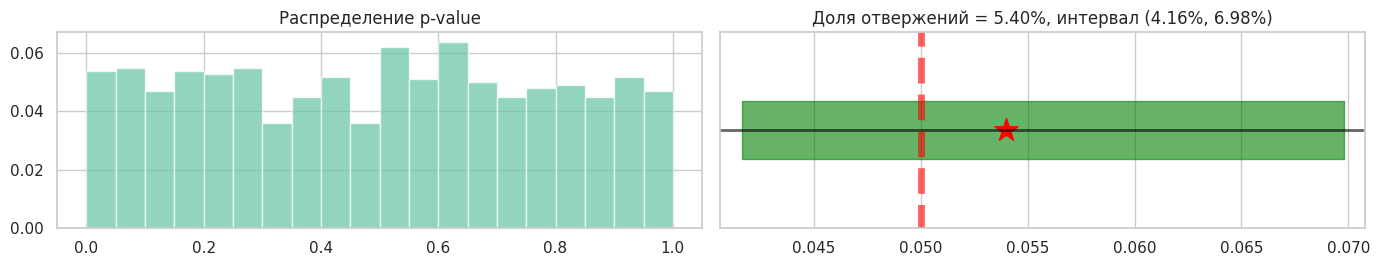

(0.054, (0.04162131372306272, 0.06979215484605245))

In [25]:
p = 0.6
strata_weights = (1 - p, p)
run_experiments(
    test=lambda x, y: ttest_bootstrap(x, y, strata_weights, B=1000),
    data=data,
    generate_samples=random_sampler,
    sample_size=data.shape[0] // 20,
    n_iter=1000,
    draw=True,
)

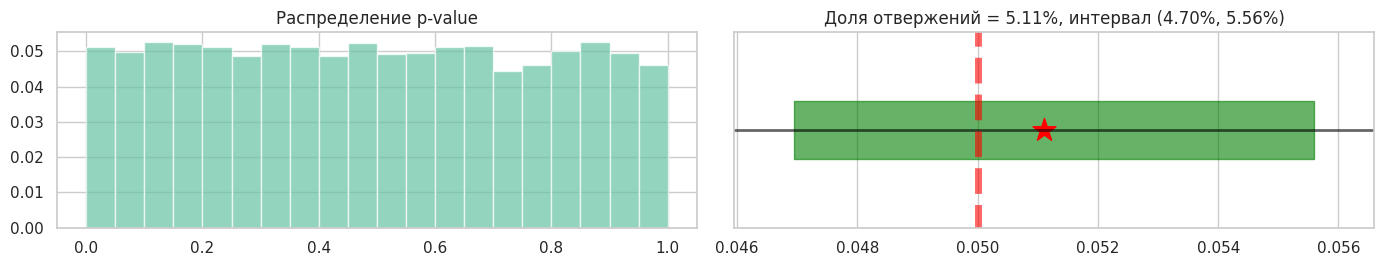

(0.0511, (0.04695388984871269, 0.055590863888480745))

In [26]:
run_experiments(
    test=lambda x, y:sps.ttest_ind(x["sample"], y["sample"]),
    data=data,
    generate_samples=random_sampler,
    sample_size=data.shape[0] // 20,
    n_iter=10000, 
    draw=True,
)

Провалидируйте полученный тест, а также сравните его по мощности со стандартным t-test. Используйте код с занятий.

In [32]:
effects_list = np.arange(0, 0.11, 0.01)

powers_perm, left_bounds_perm, right_bounds_perm = estimate_power(
    test=lambda x, y: ttest_bootstrap(x, y, strata_weights, B=1000),
    data=data,
    generate_samples=random_sampler,
    sample_size=int(data.shape[0] // 20),
    n_iter=200, 
    effects_list=effects_list,
)

In [31]:
powers_standart, left_bounds_standart, right_bounds_standart = estimate_power(
    test=lambda x, y: sps.ttest_ind(x["sample"], y["sample"]),
    data=data,
    generate_samples=random_sampler,
    sample_size=int(data.shape[0] // 20),
    n_iter=1000, 
    effects_list=effects_list,
)

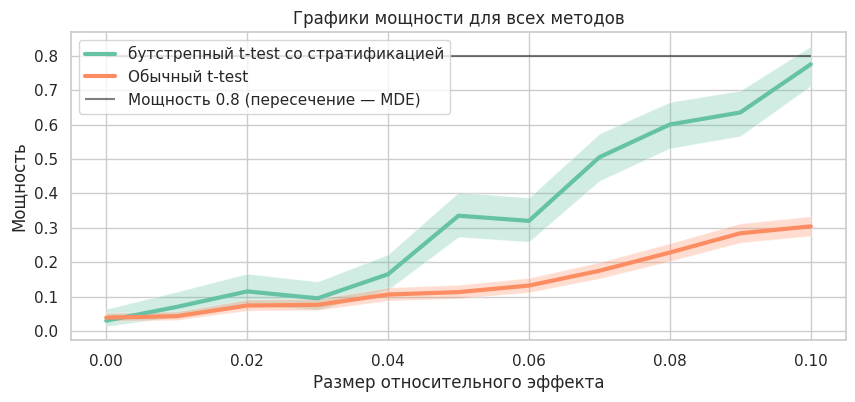

In [ ]:
labels = [
    "бутстрепный t-test со стратификацией",
    "Обычный t-test",
]

draw_power(
    [powers_perm, powers_standart],
    [left_bounds_perm, left_bounds_standart],
    [right_bounds_perm, right_bounds_standart],
    effects_list=effects_list,
    label=labels,
    title="Графики мощности для всех методов",
    new_figure=True
)

<b><font color="#00b565" size="5">Конец исправлений</font></b>

**Выводы:**

Как видим, бутстреп помогает поддерживать ошибку первого рода, вместе с тем благодаря стратификации мы получили более мощный критерий, хоть это и очень затратно по времени